In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/CarPrice_Assignment.csv')
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [ ]:
data = data.drop(columns='car_ID')
data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [ ]:
def correct_brand_name(car_name):
    brand_model = car_name.split(' ', 1)
    brand = brand_model[0].lower()
    model = brand_model[1] if len(brand_model) > 1 else ''

    brand_correction = {
        'maxda': 'mazda',
        'nissan': 'nissan',
        'porcshce': 'porsche',
        'toyouta': 'toyota',
        'vokswagen': 'volkswagen',
        'vw': 'volkswagen'
    }
    corrected_brand = brand_correction.get(brand, brand)
    return f'{corrected_brand} {model}'


data['CarName'] = data['CarName'].apply(correct_brand_name)

In [ ]:
print(data['doornumber'].unique())
print(data['cylindernumber'].unique())
print(data['drivewheel'].unique())

['two' 'four']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['rwd' 'fwd' '4wd']


In [ ]:
categorical_data = ['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'doornumber', 'cylindernumber']

for col, i in enumerate(categorical_data):
  print(f'{categorical_data[col]}: {data[i].unique()}')

fueltype: ['gas' 'diesel']
aspiration: ['std' 'turbo']
carbody: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel: ['rwd' 'fwd' '4wd']
enginelocation: ['front' 'rear']
enginetype: ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
fuelsystem: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
doornumber: ['two' 'four']
cylindernumber: ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [ ]:
data['fueltype'].replace({'gas': 0, 'diesel': 1}, inplace = True)
data['aspiration'].replace({'std': 0, 'turbo': 1}, inplace = True)
data['drivewheel'].replace({'rwd': 0, 'fwd': 1, '4wd': 2}, inplace = True)
data['enginelocation'].replace({'front': 0, 'rear': 1}, inplace=True)
data['doornumber'].replace({'two': 2, 'four': 4}, inplace=True)
data['cylindernumber'].replace({'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8}, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    int64  
 3   aspiration        205 non-null    int64  
 4   doornumber        205 non-null    int64  
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    int64  
 7   enginelocation    205 non-null    int64  
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

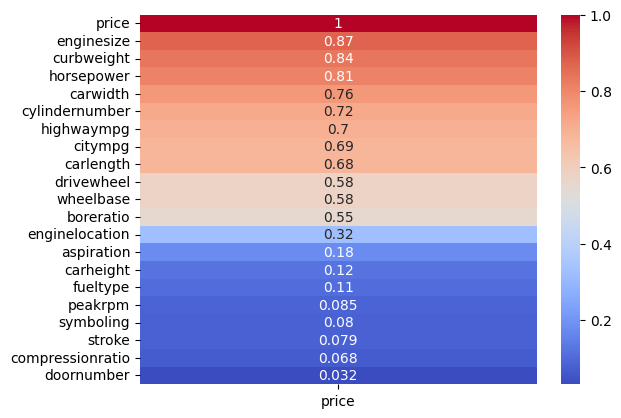

In [ ]:
categorical_features = ['carbody', 'enginetype', 'fuelsystem']
numerical_features = ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

sns.heatmap((abs(data[numerical_features].corr()))[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.show()

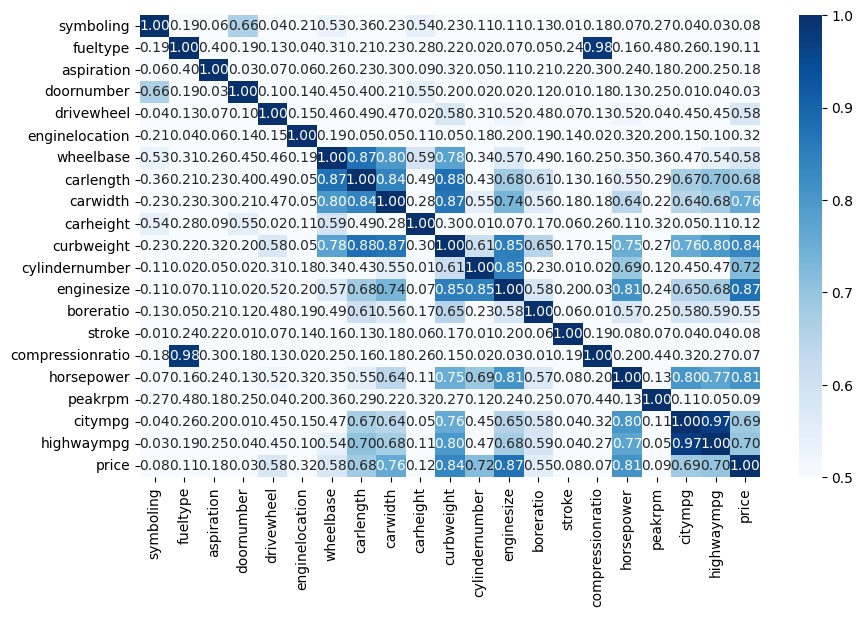

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(abs(data[numerical_features].corr()), annot=True, cmap='Blues', fmt='.2f', vmin=0.5, vmax=1)
plt.show()

In [ ]:
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

data_encoded.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

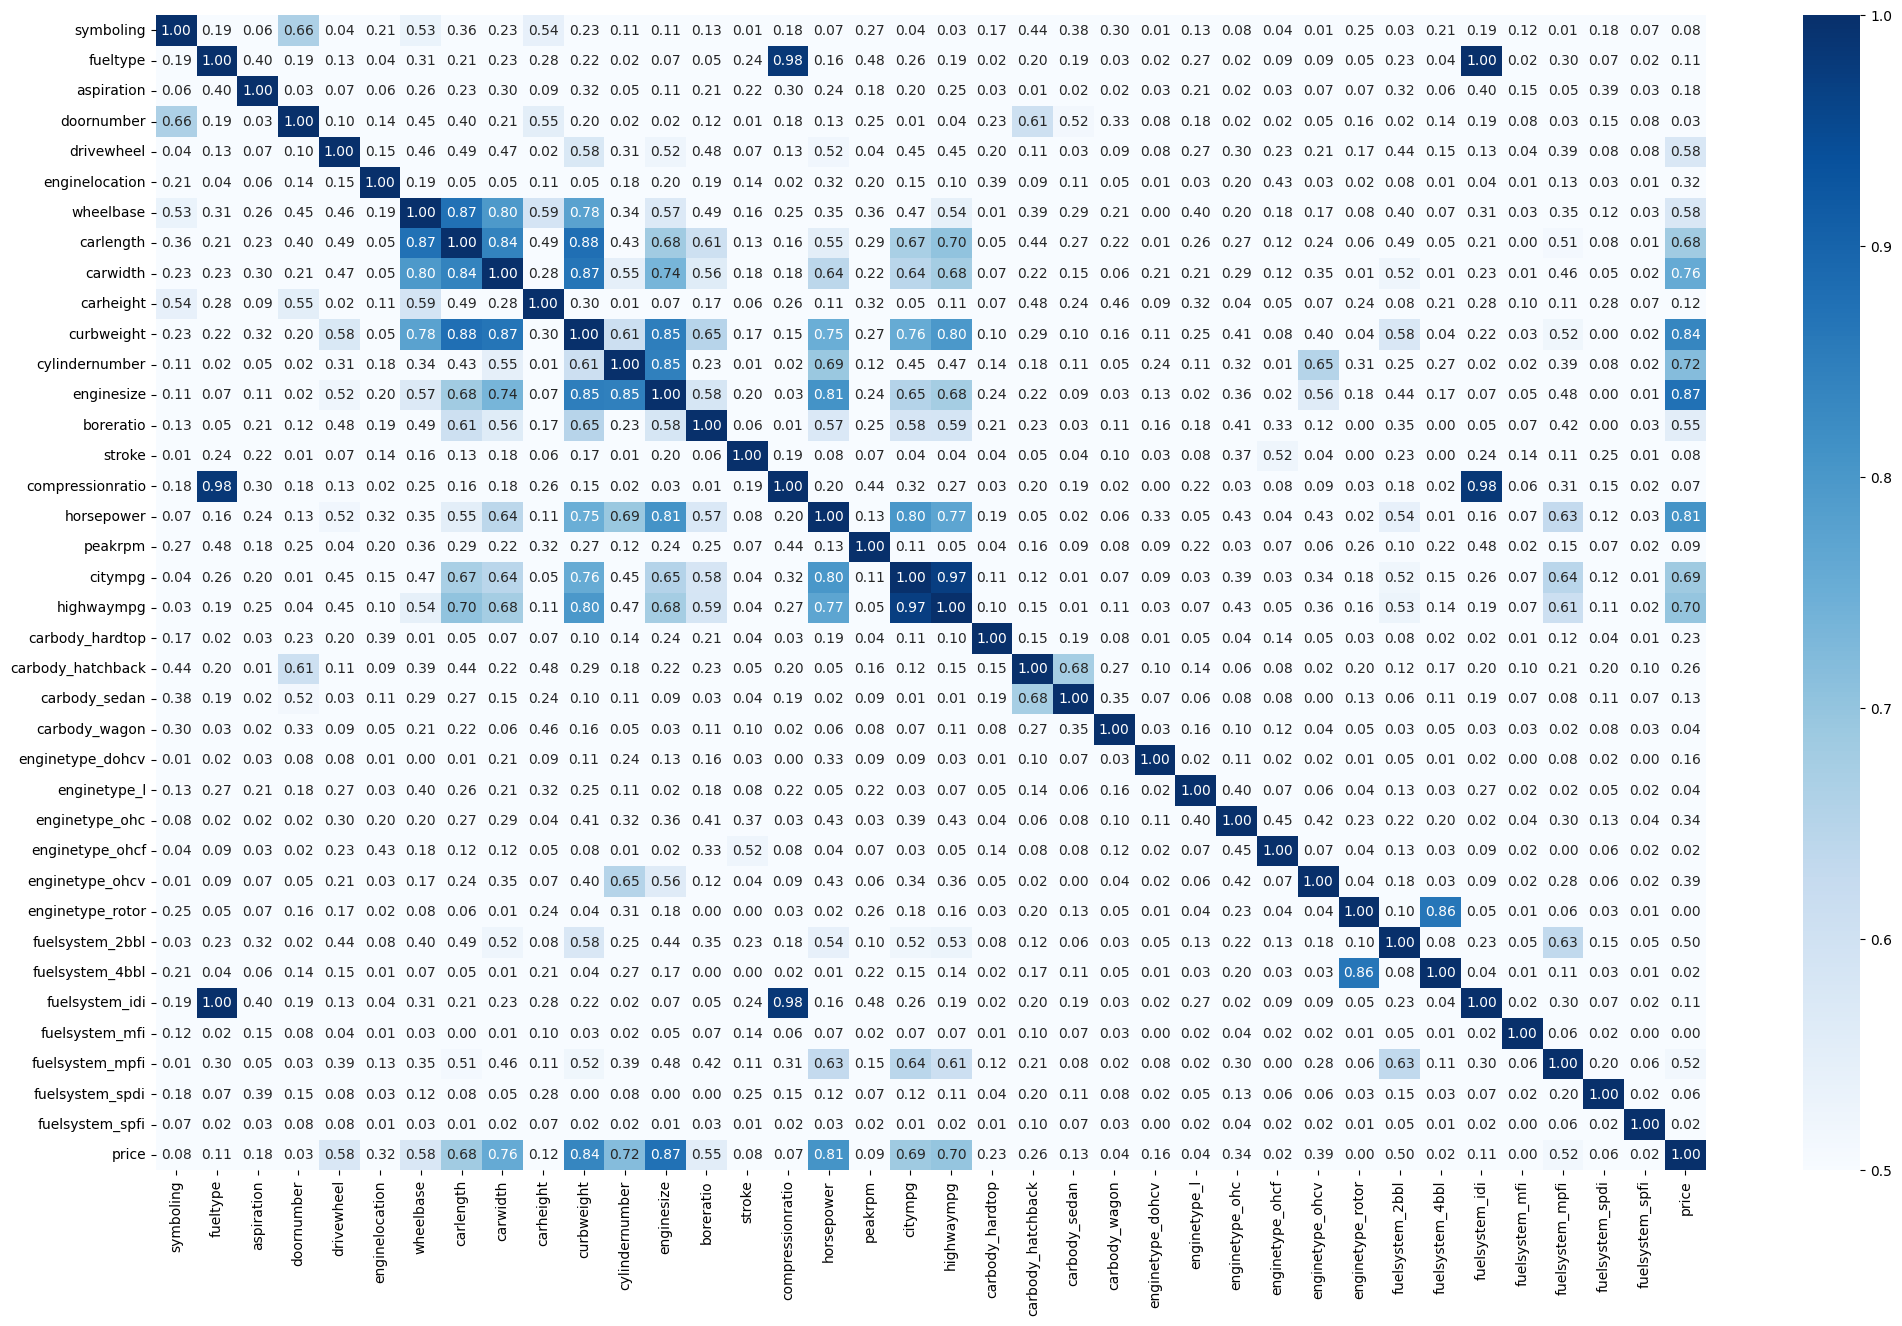

In [ ]:
categorical_features_encoded = ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'price']

plt.figure(figsize=(25, 15))
sns.heatmap(abs(data_encoded[categorical_features_encoded].corr()), annot=True, cmap='Blues', fmt='.2f', vmin=0.50, vmax=1)
plt.show()

In [ ]:
selected_features =  ['drivewheel', 'wheelbase',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'horsepower','citympg', 'highwaympg', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'price']


data_high_corr = data_encoded[selected_features]
data_high_corr['fueleconomy_mean'] = (data_high_corr['citympg'] + data_high_corr['highwaympg']) / 2
data_high_corr.loc[:, 'price'] = data_encoded['price']

data_high_corr.drop(['citympg', 'highwaympg'], axis=1, inplace=True)

<ipython-input-13-4aa245e45d56>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_high_corr['fueleconomy_mean'] = (data_high_corr['citympg'] + data_high_corr['highwaympg']) / 2
<ipython-input-13-4aa245e45d56>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_high_corr.drop(['citympg', 'highwaympg'], axis=1, inplace=True)


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

feat = ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'price']

X = data_encoded[feat].drop('price', axis=1)
y = data_encoded['price']

model = LinearRegression()
sfs = SFS(model,
          k_features=10,
          forward=True,
          floating=False,
          scoring='neg_mean_absolute_error',
          cv=5)

sfs = sfs.fit(X, y)
selected_features = list(sfs.k_feature_names_)
print(selected_features)

['carwidth', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_spdi']


In [ ]:
X = data_high_corr.drop('price', axis=1)
y = data_high_corr['price']

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_dt = {
    'max_depth': [1, 3, 5, 7],
    'min_samples_split': [2, 3, 4, 6]
}

grid_dt = GridSearchCV(DecisionTreeRegressor(), param_dt, cv = 5)
grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_params_
best_score_dt = grid_dt.best_score_
print(best_dt, best_score_dt)

{'max_depth': 7, 'min_samples_split': 2} 0.8395613234580012


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

model_dt = DecisionTreeRegressor(max_depth = 7, min_samples_split = 2)
model_dt.fit(X_train, y_train)

pred_dt = model_dt.predict(X_test)
mae_dt = mean_absolute_error(y_test, pred_dt)
print(f'Значение ошибки mae для DecisionTreeRegressor: {mae_dt}')

Значение ошибки mae для DecisionTreeRegressor: 1887.878469907407


In [ ]:
from sklearn.ensemble import RandomForestRegressor

param_rf = {
    'n_estimators': [100, 200, 300, 150],
    'max_depth': [3, 5, 8, 10]
}

grid_rf = GridSearchCV(RandomForestRegressor(), param_rf, cv = 5)
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_params_
best_score_rf = grid_rf.best_score_
print(best_rf, best_score_rf)

{'max_depth': 10, 'n_estimators': 150} 0.8707720065282899


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model_rf = RandomForestRegressor(max_depth=10, n_estimators=150)
model_rf.fit(X_train, y_train)

pred_rf = model_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, pred_rf)
print(f'Значение ошибки mae для RandomForestRegressor: {mae_rf}')

Значение ошибки mae для RandomForestRegressor: 1803.5173504273505


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.9 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor()
cat.fit(X_train,y_train,verbose=False)


pred_cat = cat.predict(X_test)
mae_cat = mean_absolute_error(y_test, pred_cat)
print(f'Значение ошибки mae для CatBoost: {mae_cat}')

Значение ошибки mae для CatBoost: 2026.6578809814152


In [34]:
!pip install neptune

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.6/502.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.1 MB/s eta 0:00:00
  Created wheel for bravado-core: filename=bravado_core-6.1.1-py2.py3-none-any.whl size=67672 sha256=51d3c8401c56853915df9fc98ec795de81c195158698d01895cdf6847fa645d6
  Stored in directory: /root/.cache/pip/wheels/42/35/4a/44ec4c3

In [33]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.7 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU ,PReLU , LeakyReLU , ELU
from tensorflow.keras.layers import Dropout
import tensorflow as tf

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


num_vars = ['drivewheel', 'wheelbase',
       'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'horsepower','fueleconomy_mean']

X = data_high_corr.drop('price', axis=1)
y = data_high_corr['price']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[num_vars])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.3, random_state=42)

In [ ]:
import optuna
import neptune

run = neptune.init_project(project="delakoka/HW27", api_token = ("eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIyMDNhNjVjYi1jZjU1LTQ5MjItODM0Zi03ZDQyNzhhZGQ2ODYifQ=="))


def objective(trial):
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    optimizer = trial.suggest_categorical('optimizer', ['Adam', 'SGD'])

    units_layer1 = trial.suggest_int('units_layer1', 32, 512)
    units_layer2 = trial.suggest_int('units_layer2', 32, 512)
    units_layer3 = trial.suggest_int('units_layer3', 32, 512)

    epochs = trial.suggest_int('epochs', 100, 1000)

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(units_layer1, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(units_layer2, activation='relu'),
        tf.keras.layers.Dropout(0.38),
        tf.keras.layers.Dense(units_layer3, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    if optimizer == 'Adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
    model_history = model.fit(X_train, y_train, epochs=epochs, batch_size=16, validation_data=(X_test, y_test))

    for epoch in range(epochs):
        run["train/loss"].log(model_history.history['loss'][epoch])
        run["train/mae"].log(model_history.history['mae'][epoch])
        run["validation/loss"].log(model_history.history['val_loss'][epoch])
        run["validation/mae"].log(model_history.history['val_mae'][epoch])

    return model_history.history['val_loss'][-1]


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
run.stop()

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/delakoka/HW27/


[I 2024-07-03 13:57:36,216] A new study created in memory with name: no-name-05dc8276-5683-468f-854e-812580e51788


Epoch 1/397


<ipython-input-36-63da4995eacf>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)


4/4 [==============================] - 4s 115ms/step - loss: 14818.7861 - mae: 14818.7861 - val_loss: 12623.5557 - val_mae: 12623.5557
Epoch 2/397
4/4 [==============================] - 0s 34ms/step - loss: 14818.7910 - mae: 14818.7910 - val_loss: 12623.5479 - val_mae: 12623.5479
Epoch 3/397
4/4 [==============================] - 0s 36ms/step - loss: 14818.7715 - mae: 14818.7715 - val_loss: 12623.5371 - val_mae: 12623.5371
Epoch 4/397
4/4 [==============================] - 0s 38ms/step - loss: 14818.7734 - mae: 14818.7734 - val_loss: 12623.5283 - val_mae: 12623.5283
Epoch 5/397
4/4 [==============================] - 0s 22ms/step - loss: 14818.7578 - mae: 14818.7578 - val_loss: 12623.5195 - val_mae: 12623.5195
Epoch 6/397
4/4 [==============================] - 0s 34ms/step - loss: 14818.7451 - mae: 14818.7451 - val_loss: 12623.5117 - val_mae: 12623.5117
Epoch 7/397
4/4 [==============================] - 0s 26ms/step - loss: 14818.7373 - mae: 14818.7373 - val_loss: 12623.5039 - val_mae: 

[I 2024-07-03 13:58:09,135] Trial 0 finished with value: 12312.9990234375 and parameters: {'learning_rate': 1.6644809875311096e-05, 'optimizer': 'Adam', 'units_layer1': 347, 'units_layer2': 181, 'units_layer3': 387, 'epochs': 397}. Best is trial 0 with value: 12312.9990234375.


Epoch 1/284
4/4 [==============================] - 2s 55ms/step - loss: 14818.6006 - mae: 14818.6006 - val_loss: 12623.1953 - val_mae: 12623.1953
Epoch 2/284
4/4 [==============================] - 0s 15ms/step - loss: 14818.2998 - mae: 14818.2998 - val_loss: 12622.8564 - val_mae: 12622.8564
Epoch 3/284
4/4 [==============================] - 0s 14ms/step - loss: 14817.9150 - mae: 14817.9150 - val_loss: 12622.3711 - val_mae: 12622.3711
Epoch 4/284
4/4 [==============================] - 0s 14ms/step - loss: 14817.3555 - mae: 14817.3555 - val_loss: 12621.6572 - val_mae: 12621.6572
Epoch 5/284
4/4 [==============================] - 0s 20ms/step - loss: 14816.4824 - mae: 14816.4824 - val_loss: 12620.6250 - val_mae: 12620.6250
Epoch 6/284
4/4 [==============================] - 0s 15ms/step - loss: 14815.2881 - mae: 14815.2881 - val_loss: 12619.1465 - val_mae: 12619.1465
Epoch 7/284
4/4 [==============================] - 0s 16ms/step - loss: 14813.6025 - mae: 14813.6025 - val_loss: 12617.0576 

[I 2024-07-03 13:58:30,141] Trial 1 finished with value: 2248.47412109375 and parameters: {'learning_rate': 0.00037568276853583297, 'optimizer': 'Adam', 'units_layer1': 395, 'units_layer2': 237, 'units_layer3': 457, 'epochs': 284}. Best is trial 1 with value: 2248.47412109375.


Epoch 1/358
4/4 [==============================] - 2s 98ms/step - loss: 14818.7578 - mae: 14818.7578 - val_loss: 12623.5127 - val_mae: 12623.5127
Epoch 2/358
4/4 [==============================] - 0s 22ms/step - loss: 14818.7510 - mae: 14818.7510 - val_loss: 12623.5127 - val_mae: 12623.5127
Epoch 3/358
4/4 [==============================] - 0s 35ms/step - loss: 14818.7490 - mae: 14818.7490 - val_loss: 12623.5127 - val_mae: 12623.5127
Epoch 4/358
4/4 [==============================] - 0s 19ms/step - loss: 14818.7539 - mae: 14818.7539 - val_loss: 12623.5127 - val_mae: 12623.5127
Epoch 5/358
4/4 [==============================] - 0s 17ms/step - loss: 14818.7441 - mae: 14818.7441 - val_loss: 12623.5117 - val_mae: 12623.5117
Epoch 6/358
4/4 [==============================] - 0s 17ms/step - loss: 14818.7490 - mae: 14818.7490 - val_loss: 12623.5117 - val_mae: 12623.5117
Epoch 7/358
4/4 [==============================] - 0s 14ms/step - loss: 14818.7500 - mae: 14818.7500 - val_loss: 12623.5107 

[I 2024-07-03 13:59:12,323] Trial 2 finished with value: 12623.390625 and parameters: {'learning_rate': 2.737322378726213e-05, 'optimizer': 'SGD', 'units_layer1': 62, 'units_layer2': 395, 'units_layer3': 496, 'epochs': 358}. Best is trial 1 with value: 2248.47412109375.


Epoch 1/948
4/4 [==============================] - 1s 61ms/step - loss: 14818.7207 - mae: 14818.7207 - val_loss: 12623.4795 - val_mae: 12623.4795
Epoch 2/948
4/4 [==============================] - 0s 16ms/step - loss: 14818.7197 - mae: 14818.7197 - val_loss: 12623.4766 - val_mae: 12623.4766
Epoch 3/948
4/4 [==============================] - 0s 18ms/step - loss: 14818.7168 - mae: 14818.7168 - val_loss: 12623.4746 - val_mae: 12623.4746
Epoch 4/948
4/4 [==============================] - 0s 17ms/step - loss: 14818.7100 - mae: 14818.7100 - val_loss: 12623.4736 - val_mae: 12623.4736
Epoch 5/948
4/4 [==============================] - 0s 16ms/step - loss: 14818.7178 - mae: 14818.7178 - val_loss: 12623.4727 - val_mae: 12623.4727
Epoch 6/948
4/4 [==============================] - 0s 15ms/step - loss: 14818.7119 - mae: 14818.7119 - val_loss: 12623.4707 - val_mae: 12623.4707
Epoch 7/948
4/4 [==============================] - 0s 18ms/step - loss: 14818.7168 - mae: 14818.7168 - val_loss: 12623.4688 

[I 2024-07-03 14:00:26,004] Trial 3 finished with value: 12619.982421875 and parameters: {'learning_rate': 0.00011750230457869178, 'optimizer': 'SGD', 'units_layer1': 396, 'units_layer2': 416, 'units_layer3': 509, 'epochs': 948}. Best is trial 1 with value: 2248.47412109375.


Epoch 1/972
4/4 [==============================] - 2s 55ms/step - loss: 14818.4277 - mae: 14818.4277 - val_loss: 12622.6914 - val_mae: 12622.6914
Epoch 2/972
4/4 [==============================] - 0s 15ms/step - loss: 14817.4014 - mae: 14817.4014 - val_loss: 12621.3457 - val_mae: 12621.3457
Epoch 3/972
4/4 [==============================] - 0s 15ms/step - loss: 14815.7168 - mae: 14815.7168 - val_loss: 12618.8867 - val_mae: 12618.8867
Epoch 4/972
4/4 [==============================] - 0s 15ms/step - loss: 14812.5410 - mae: 14812.5410 - val_loss: 12614.6182 - val_mae: 12614.6182
Epoch 5/972
4/4 [==============================] - 0s 17ms/step - loss: 14807.3730 - mae: 14807.3730 - val_loss: 12607.5986 - val_mae: 12607.5986
Epoch 6/972
4/4 [==============================] - 0s 18ms/step - loss: 14798.6289 - mae: 14798.6289 - val_loss: 12596.4072 - val_mae: 12596.4072
Epoch 7/972
4/4 [==============================] - 0s 19ms/step - loss: 14785.5361 - mae: 14785.5361 - val_loss: 12579.0684 

[I 2024-07-03 14:01:44,935] Trial 4 finished with value: 2099.8857421875 and parameters: {'learning_rate': 0.0010564718086259718, 'optimizer': 'Adam', 'units_layer1': 84, 'units_layer2': 368, 'units_layer3': 406, 'epochs': 972}. Best is trial 4 with value: 2099.8857421875.


Epoch 1/856
4/4 [==============================] - 1s 55ms/step - loss: 14818.7373 - mae: 14818.7373 - val_loss: 12623.4912 - val_mae: 12623.4912
Epoch 2/856
4/4 [==============================] - 0s 16ms/step - loss: 14818.7471 - mae: 14818.7471 - val_loss: 12623.4912 - val_mae: 12623.4912
Epoch 3/856
4/4 [==============================] - 0s 18ms/step - loss: 14818.7441 - mae: 14818.7441 - val_loss: 12623.4912 - val_mae: 12623.4912
Epoch 4/856
4/4 [==============================] - 0s 18ms/step - loss: 14818.7402 - mae: 14818.7402 - val_loss: 12623.4902 - val_mae: 12623.4902
Epoch 5/856
4/4 [==============================] - 0s 18ms/step - loss: 14818.7412 - mae: 14818.7422 - val_loss: 12623.4902 - val_mae: 12623.4902
Epoch 6/856
4/4 [==============================] - 0s 38ms/step - loss: 14818.7334 - mae: 14818.7334 - val_loss: 12623.4883 - val_mae: 12623.4883
Epoch 7/856
4/4 [==============================] - 0s 16ms/step - loss: 14818.7363 - mae: 14818.7363 - val_loss: 12623.4883 

[I 2024-07-03 14:03:07,722] Trial 5 finished with value: 12623.1005859375 and parameters: {'learning_rate': 3.9531847892280175e-05, 'optimizer': 'SGD', 'units_layer1': 402, 'units_layer2': 272, 'units_layer3': 476, 'epochs': 856}. Best is trial 4 with value: 2099.8857421875.


Epoch 1/574
4/4 [==============================] - 1s 73ms/step - loss: 14818.6943 - mae: 14818.6943 - val_loss: 12623.3975 - val_mae: 12623.3975
Epoch 2/574
4/4 [==============================] - 0s 17ms/step - loss: 14818.6045 - mae: 14818.6045 - val_loss: 12623.3037 - val_mae: 12623.3037
Epoch 3/574
4/4 [==============================] - 0s 19ms/step - loss: 14818.5127 - mae: 14818.5127 - val_loss: 12623.2100 - val_mae: 12623.2100
Epoch 4/574
4/4 [==============================] - 0s 16ms/step - loss: 14818.4189 - mae: 14818.4189 - val_loss: 12623.1104 - val_mae: 12623.1104
Epoch 5/574
4/4 [==============================] - 0s 17ms/step - loss: 14818.3164 - mae: 14818.3164 - val_loss: 12623.0049 - val_mae: 12623.0049
Epoch 6/574
4/4 [==============================] - 0s 16ms/step - loss: 14818.2129 - mae: 14818.2129 - val_loss: 12622.8916 - val_mae: 12622.8916
Epoch 7/574
4/4 [==============================] - 0s 17ms/step - loss: 14818.0820 - mae: 14818.0820 - val_loss: 12622.7637 

[I 2024-07-03 14:03:54,418] Trial 6 finished with value: 6309.9443359375 and parameters: {'learning_rate': 0.011190384401359102, 'optimizer': 'SGD', 'units_layer1': 489, 'units_layer2': 42, 'units_layer3': 269, 'epochs': 574}. Best is trial 4 with value: 2099.8857421875.


Epoch 1/824
4/4 [==============================] - 2s 61ms/step - loss: 14818.7412 - mae: 14818.7412 - val_loss: 12623.5049 - val_mae: 12623.5049
Epoch 2/824
4/4 [==============================] - 0s 22ms/step - loss: 14818.7412 - mae: 14818.7412 - val_loss: 12623.5039 - val_mae: 12623.5039
Epoch 3/824
4/4 [==============================] - 0s 17ms/step - loss: 14818.7314 - mae: 14818.7314 - val_loss: 12623.5039 - val_mae: 12623.5039
Epoch 4/824
4/4 [==============================] - 0s 17ms/step - loss: 14818.7373 - mae: 14818.7373 - val_loss: 12623.5039 - val_mae: 12623.5039
Epoch 5/824
4/4 [==============================] - 0s 19ms/step - loss: 14818.7373 - mae: 14818.7373 - val_loss: 12623.5039 - val_mae: 12623.5039
Epoch 6/824
4/4 [==============================] - 0s 18ms/step - loss: 14818.7402 - mae: 14818.7402 - val_loss: 12623.5039 - val_mae: 12623.5039
Epoch 7/824
4/4 [==============================] - 0s 19ms/step - loss: 14818.7422 - mae: 14818.7422 - val_loss: 12623.5039 

[I 2024-07-03 14:05:04,622] Trial 7 finished with value: 12623.1689453125 and parameters: {'learning_rate': 3.334479353165584e-05, 'optimizer': 'SGD', 'units_layer1': 403, 'units_layer2': 324, 'units_layer3': 381, 'epochs': 824}. Best is trial 4 with value: 2099.8857421875.


Epoch 1/356
4/4 [==============================] - 1s 58ms/step - loss: 14818.6846 - mae: 14818.6846 - val_loss: 12623.3330 - val_mae: 12623.3330
Epoch 2/356
4/4 [==============================] - 0s 18ms/step - loss: 14818.4941 - mae: 14818.4941 - val_loss: 12623.1367 - val_mae: 12623.1367
Epoch 3/356
4/4 [==============================] - 0s 28ms/step - loss: 14818.2725 - mae: 14818.2725 - val_loss: 12622.9180 - val_mae: 12622.9180
Epoch 4/356
4/4 [==============================] - 0s 20ms/step - loss: 14818.0430 - mae: 14818.0430 - val_loss: 12622.6670 - val_mae: 12622.6670
Epoch 5/356
4/4 [==============================] - 0s 18ms/step - loss: 14817.7881 - mae: 14817.7881 - val_loss: 12622.3662 - val_mae: 12622.3662
Epoch 6/356
4/4 [==============================] - 0s 21ms/step - loss: 14817.4453 - mae: 14817.4453 - val_loss: 12621.9805 - val_mae: 12621.9805
Epoch 7/356
4/4 [==============================] - 0s 19ms/step - loss: 14816.9971 - mae: 14816.9971 - val_loss: 12621.4551 

[I 2024-07-03 14:05:46,426] Trial 8 finished with value: 5126.017578125 and parameters: {'learning_rate': 0.011897864948455137, 'optimizer': 'SGD', 'units_layer1': 100, 'units_layer2': 466, 'units_layer3': 372, 'epochs': 356}. Best is trial 4 with value: 2099.8857421875.


Epoch 1/561
4/4 [==============================] - 2s 92ms/step - loss: 14818.6904 - mae: 14818.6904 - val_loss: 12623.4355 - val_mae: 12623.4355
Epoch 2/561
4/4 [==============================] - 0s 34ms/step - loss: 14818.6621 - mae: 14818.6621 - val_loss: 12623.4033 - val_mae: 12623.4033
Epoch 3/561
4/4 [==============================] - 0s 37ms/step - loss: 14818.6299 - mae: 14818.6299 - val_loss: 12623.3730 - val_mae: 12623.3730
Epoch 4/561
4/4 [==============================] - 0s 40ms/step - loss: 14818.5918 - mae: 14818.5918 - val_loss: 12623.3389 - val_mae: 12623.3389
Epoch 5/561
4/4 [==============================] - 0s 44ms/step - loss: 14818.5615 - mae: 14818.5615 - val_loss: 12623.3066 - val_mae: 12623.3066
Epoch 6/561
4/4 [==============================] - 0s 43ms/step - loss: 14818.5332 - mae: 14818.5332 - val_loss: 12623.2734 - val_mae: 12623.2734
Epoch 7/561
4/4 [==============================] - 0s 21ms/step - loss: 14818.4951 - mae: 14818.4951 - val_loss: 12623.2402 

[I 2024-07-03 14:06:33,967] Trial 9 finished with value: 3181.964599609375 and parameters: {'learning_rate': 0.002949589392555769, 'optimizer': 'SGD', 'units_layer1': 364, 'units_layer2': 252, 'units_layer3': 479, 'epochs': 561}. Best is trial 4 with value: 2099.8857421875.


Epoch 1/692
4/4 [==============================] - 2s 62ms/step - loss: 13090.2090 - mae: 13090.2090 - val_loss: 5271.3418 - val_mae: 5271.3418
Epoch 2/692
4/4 [==============================] - 0s 19ms/step - loss: 7553.1401 - mae: 7553.1401 - val_loss: 5246.9121 - val_mae: 5246.9121
Epoch 3/692
4/4 [==============================] - 0s 20ms/step - loss: 6282.7349 - mae: 6282.7349 - val_loss: 3604.0139 - val_mae: 3604.0139
Epoch 4/692
4/4 [==============================] - 0s 19ms/step - loss: 3930.3040 - mae: 3930.3040 - val_loss: 3249.5059 - val_mae: 3249.5059
Epoch 5/692
4/4 [==============================] - 0s 20ms/step - loss: 3483.3730 - mae: 3483.3730 - val_loss: 2711.5776 - val_mae: 2711.5776
Epoch 6/692
4/4 [==============================] - 0s 20ms/step - loss: 3815.6116 - mae: 3815.6118 - val_loss: 4877.4482 - val_mae: 4877.4482
Epoch 7/692
4/4 [==============================] - 0s 22ms/step - loss: 6923.9990 - mae: 6923.9990 - val_loss: 5949.4419 - val_mae: 5949.4419
Epoc

[I 2024-07-03 14:07:35,945] Trial 10 finished with value: 2133.49609375 and parameters: {'learning_rate': 0.07208414067152961, 'optimizer': 'Adam', 'units_layer1': 181, 'units_layer2': 507, 'units_layer3': 77, 'epochs': 692}. Best is trial 4 with value: 2099.8857421875.


Epoch 1/742
4/4 [==============================] - 2s 59ms/step - loss: 13770.5479 - mae: 13770.5479 - val_loss: 4386.3687 - val_mae: 4386.3687
Epoch 2/742
4/4 [==============================] - 0s 18ms/step - loss: 7186.8457 - mae: 7186.8457 - val_loss: 4622.0923 - val_mae: 4622.0923
Epoch 3/742
4/4 [==============================] - 0s 18ms/step - loss: 8042.5552 - mae: 8042.5552 - val_loss: 5238.0107 - val_mae: 5238.0107
Epoch 4/742
4/4 [==============================] - 0s 21ms/step - loss: 5012.6660 - mae: 5012.6660 - val_loss: 7625.3965 - val_mae: 7625.3965
Epoch 5/742
4/4 [==============================] - 0s 20ms/step - loss: 5952.4019 - mae: 5952.4019 - val_loss: 4198.7500 - val_mae: 4198.7500
Epoch 6/742
4/4 [==============================] - 0s 20ms/step - loss: 4274.3301 - mae: 4274.3301 - val_loss: 3566.2727 - val_mae: 3566.2727
Epoch 7/742
4/4 [==============================] - 0s 18ms/step - loss: 4546.9146 - mae: 4546.9146 - val_loss: 2931.7378 - val_mae: 2931.7378
Epoc

[I 2024-07-03 14:08:44,247] Trial 11 finished with value: 2343.537353515625 and parameters: {'learning_rate': 0.0776692193208548, 'optimizer': 'Adam', 'units_layer1': 178, 'units_layer2': 504, 'units_layer3': 49, 'epochs': 742}. Best is trial 4 with value: 2099.8857421875.


Epoch 1/101
4/4 [==============================] - 2s 55ms/step - loss: 14056.2822 - mae: 14056.2822 - val_loss: 5649.7861 - val_mae: 5649.7861
Epoch 2/101
4/4 [==============================] - 0s 20ms/step - loss: 8215.5195 - mae: 8215.5195 - val_loss: 3729.8376 - val_mae: 3729.8376
Epoch 3/101
4/4 [==============================] - 0s 19ms/step - loss: 6454.6162 - mae: 6454.6162 - val_loss: 3773.2942 - val_mae: 3773.2942
Epoch 4/101
4/4 [==============================] - 0s 18ms/step - loss: 5687.6465 - mae: 5687.6465 - val_loss: 4211.4116 - val_mae: 4211.4116
Epoch 5/101
4/4 [==============================] - 0s 18ms/step - loss: 5041.9653 - mae: 5041.9653 - val_loss: 4387.6152 - val_mae: 4387.6152
Epoch 6/101
4/4 [==============================] - 0s 22ms/step - loss: 4518.9976 - mae: 4518.9976 - val_loss: 3211.8645 - val_mae: 3211.8645
Epoch 7/101
4/4 [==============================] - 0s 19ms/step - loss: 3569.2668 - mae: 3569.2668 - val_loss: 2946.3823 - val_mae: 2946.3823
Epoc

[I 2024-07-03 14:08:55,368] Trial 12 finished with value: 4028.98388671875 and parameters: {'learning_rate': 0.07734938352678492, 'optimizer': 'Adam', 'units_layer1': 187, 'units_layer2': 368, 'units_layer3': 78, 'epochs': 101}. Best is trial 4 with value: 2099.8857421875.


Epoch 1/992
4/4 [==============================] - 2s 59ms/step - loss: 14818.4717 - mae: 14818.4717 - val_loss: 12622.8008 - val_mae: 12622.8008
Epoch 2/992
4/4 [==============================] - 0s 19ms/step - loss: 14817.6699 - mae: 14817.6699 - val_loss: 12621.7988 - val_mae: 12621.7988
Epoch 3/992
4/4 [==============================] - 0s 21ms/step - loss: 14816.3926 - mae: 14816.3926 - val_loss: 12620.1074 - val_mae: 12620.1074
Epoch 4/992
4/4 [==============================] - 0s 21ms/step - loss: 14814.2539 - mae: 14814.2539 - val_loss: 12617.2930 - val_mae: 12617.2930
Epoch 5/992
4/4 [==============================] - 0s 25ms/step - loss: 14810.7363 - mae: 14810.7363 - val_loss: 12612.7793 - val_mae: 12612.7793
Epoch 6/992
4/4 [==============================] - 0s 20ms/step - loss: 14805.2441 - mae: 14805.2441 - val_loss: 12605.7715 - val_mae: 12605.7715
Epoch 7/992
4/4 [==============================] - 0s 21ms/step - loss: 14796.4014 - mae: 14796.4014 - val_loss: 12595.1875 

[I 2024-07-03 14:10:34,812] Trial 13 finished with value: 2079.7763671875 and parameters: {'learning_rate': 0.0008948903669720801, 'optimizer': 'Adam', 'units_layer1': 167, 'units_layer2': 452, 'units_layer3': 176, 'epochs': 992}. Best is trial 13 with value: 2079.7763671875.


Epoch 1/976
4/4 [==============================] - 2s 69ms/step - loss: 14818.5459 - mae: 14818.5459 - val_loss: 12622.9707 - val_mae: 12622.9707
Epoch 2/976
4/4 [==============================] - 0s 25ms/step - loss: 14817.9492 - mae: 14817.9492 - val_loss: 12622.2607 - val_mae: 12622.2607
Epoch 3/976
4/4 [==============================] - 0s 20ms/step - loss: 14817.0283 - mae: 14817.0283 - val_loss: 12621.0830 - val_mae: 12621.0830
Epoch 4/976
4/4 [==============================] - 0s 21ms/step - loss: 14815.5039 - mae: 14815.5039 - val_loss: 12619.0801 - val_mae: 12619.0801
Epoch 5/976
4/4 [==============================] - 0s 34ms/step - loss: 14813.1025 - mae: 14813.1025 - val_loss: 12615.8242 - val_mae: 12615.8242
Epoch 6/976
4/4 [==============================] - 0s 19ms/step - loss: 14809.1416 - mae: 14809.1416 - val_loss: 12610.7373 - val_mae: 12610.7373
Epoch 7/976
4/4 [==============================] - 0s 20ms/step - loss: 14802.5742 - mae: 14802.5742 - val_loss: 12603.0029 

[I 2024-07-03 14:12:14,772] Trial 14 finished with value: 2108.382080078125 and parameters: {'learning_rate': 0.0009435177668780481, 'optimizer': 'Adam', 'units_layer1': 115, 'units_layer2': 344, 'units_layer3': 188, 'epochs': 976}. Best is trial 13 with value: 2079.7763671875.


Epoch 1/978
4/4 [==============================] - 2s 56ms/step - loss: 14818.5723 - mae: 14818.5723 - val_loss: 12623.1660 - val_mae: 12623.1660
Epoch 2/978
4/4 [==============================] - 0s 20ms/step - loss: 14818.2930 - mae: 14818.2930 - val_loss: 12622.8711 - val_mae: 12622.8711
Epoch 3/978
4/4 [==============================] - 0s 20ms/step - loss: 14817.9590 - mae: 14817.9590 - val_loss: 12622.5068 - val_mae: 12622.5068
Epoch 4/978
4/4 [==============================] - 0s 32ms/step - loss: 14817.5410 - mae: 14817.5410 - val_loss: 12622.0244 - val_mae: 12622.0244
Epoch 5/978
4/4 [==============================] - 0s 33ms/step - loss: 14816.9912 - mae: 14816.9912 - val_loss: 12621.3770 - val_mae: 12621.3770
Epoch 6/978
4/4 [==============================] - 0s 21ms/step - loss: 14816.2705 - mae: 14816.2705 - val_loss: 12620.5117 - val_mae: 12620.5117
Epoch 7/978
4/4 [==============================] - 0s 21ms/step - loss: 14815.2217 - mae: 14815.2217 - val_loss: 12619.3555 

[I 2024-07-03 14:13:54,364] Trial 15 finished with value: 2132.48388671875 and parameters: {'learning_rate': 0.00031634002025908084, 'optimizer': 'Adam', 'units_layer1': 269, 'units_layer2': 444, 'units_layer3': 211, 'epochs': 978}. Best is trial 13 with value: 2079.7763671875.


Epoch 1/843
4/4 [==============================] - 2s 81ms/step - loss: 14818.5889 - mae: 14818.5889 - val_loss: 12622.9648 - val_mae: 12622.9648
Epoch 2/843
4/4 [==============================] - 0s 29ms/step - loss: 14817.8936 - mae: 14817.8936 - val_loss: 12622.0723 - val_mae: 12622.0723
Epoch 3/843
4/4 [==============================] - 0s 27ms/step - loss: 14816.7080 - mae: 14816.7080 - val_loss: 12620.4229 - val_mae: 12620.4229
Epoch 4/843
4/4 [==============================] - 0s 29ms/step - loss: 14814.5479 - mae: 14814.5479 - val_loss: 12617.3691 - val_mae: 12617.3691
Epoch 5/843
4/4 [==============================] - 0s 31ms/step - loss: 14810.7148 - mae: 14810.7148 - val_loss: 12612.0000 - val_mae: 12612.0000
Epoch 6/843
4/4 [==============================] - 0s 37ms/step - loss: 14803.9414 - mae: 14803.9414 - val_loss: 12602.9521 - val_mae: 12602.9521
Epoch 7/843
4/4 [==============================] - 0s 41ms/step - loss: 14793.3398 - mae: 14793.3398 - val_loss: 12588.2607 

[I 2024-07-03 14:16:17,535] Trial 16 finished with value: 2102.010498046875 and parameters: {'learning_rate': 0.0023279595101751704, 'optimizer': 'Adam', 'units_layer1': 38, 'units_layer2': 135, 'units_layer3': 152, 'epochs': 843}. Best is trial 13 with value: 2079.7763671875.


Epoch 1/708
4/4 [==============================] - 2s 176ms/step - loss: 14818.4707 - mae: 14818.4707 - val_loss: 12622.7754 - val_mae: 12622.7754
Epoch 2/708
4/4 [==============================] - 0s 21ms/step - loss: 14817.6680 - mae: 14817.6689 - val_loss: 12621.7764 - val_mae: 12621.7764
Epoch 3/708
4/4 [==============================] - 0s 34ms/step - loss: 14816.3193 - mae: 14816.3193 - val_loss: 12619.9414 - val_mae: 12619.9414
Epoch 4/708
4/4 [==============================] - 0s 20ms/step - loss: 14813.9697 - mae: 14813.9697 - val_loss: 12616.7734 - val_mae: 12616.7734
Epoch 5/708
4/4 [==============================] - 0s 34ms/step - loss: 14810.0596 - mae: 14810.0596 - val_loss: 12611.5127 - val_mae: 12611.5127
Epoch 6/708
4/4 [==============================] - 0s 21ms/step - loss: 14803.5400 - mae: 14803.5400 - val_loss: 12603.1367 - val_mae: 12603.1367
Epoch 7/708
4/4 [==============================] - 0s 21ms/step - loss: 14793.3916 - mae: 14793.3916 - val_loss: 12590.1807

[I 2024-07-03 14:17:40,591] Trial 17 finished with value: 2096.415283203125 and parameters: {'learning_rate': 0.0008317828290465749, 'optimizer': 'Adam', 'units_layer1': 245, 'units_layer2': 333, 'units_layer3': 310, 'epochs': 708}. Best is trial 13 with value: 2079.7763671875.


Epoch 1/693
4/4 [==============================] - 2s 57ms/step - loss: 14818.7109 - mae: 14818.7109 - val_loss: 12623.3945 - val_mae: 12623.3945
Epoch 2/693
4/4 [==============================] - 0s 21ms/step - loss: 14818.6006 - mae: 14818.6006 - val_loss: 12623.2939 - val_mae: 12623.2939
Epoch 3/693
4/4 [==============================] - 0s 33ms/step - loss: 14818.4922 - mae: 14818.4922 - val_loss: 12623.1895 - val_mae: 12623.1895
Epoch 4/693
4/4 [==============================] - 0s 34ms/step - loss: 14818.4014 - mae: 14818.4014 - val_loss: 12623.0781 - val_mae: 12623.0781
Epoch 5/693
4/4 [==============================] - 0s 20ms/step - loss: 14818.2666 - mae: 14818.2666 - val_loss: 12622.9570 - val_mae: 12622.9570
Epoch 6/693
4/4 [==============================] - 0s 34ms/step - loss: 14818.1582 - mae: 14818.1582 - val_loss: 12622.8242 - val_mae: 12622.8242
Epoch 7/693
4/4 [==============================] - 0s 22ms/step - loss: 14818.0244 - mae: 14818.0234 - val_loss: 12622.6768 

[I 2024-07-03 14:18:51,812] Trial 18 finished with value: 2350.787353515625 and parameters: {'learning_rate': 0.00012882830816081958, 'optimizer': 'Adam', 'units_layer1': 265, 'units_layer2': 315, 'units_layer3': 247, 'epochs': 693}. Best is trial 13 with value: 2079.7763671875.


Epoch 1/638
4/4 [==============================] - 2s 61ms/step - loss: 14808.4814 - mae: 14808.4814 - val_loss: 12560.0273 - val_mae: 12560.0273
Epoch 2/638
4/4 [==============================] - 0s 21ms/step - loss: 14612.8545 - mae: 14612.8545 - val_loss: 12003.2568 - val_mae: 12003.2568
Epoch 3/638
4/4 [==============================] - 0s 20ms/step - loss: 13509.5713 - mae: 13509.5713 - val_loss: 9738.0273 - val_mae: 9738.0273
Epoch 4/638
4/4 [==============================] - 0s 33ms/step - loss: 9813.5244 - mae: 9813.5244 - val_loss: 4307.5444 - val_mae: 4307.5444
Epoch 5/638
4/4 [==============================] - 0s 26ms/step - loss: 5692.9907 - mae: 5692.9907 - val_loss: 7745.5088 - val_mae: 7745.5088
Epoch 6/638
4/4 [==============================] - 0s 20ms/step - loss: 7003.5024 - mae: 7003.5024 - val_loss: 5109.5566 - val_mae: 5109.5566
Epoch 7/638
4/4 [==============================] - 0s 34ms/step - loss: 4767.5195 - mae: 4767.5195 - val_loss: 3497.1567 - val_mae: 3497.1

[I 2024-07-03 14:20:15,182] Trial 19 finished with value: 2039.095947265625 and parameters: {'learning_rate': 0.01012583764648347, 'optimizer': 'Adam', 'units_layer1': 224, 'units_layer2': 446, 'units_layer3': 312, 'epochs': 638}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/492
4/4 [==============================] - 2s 57ms/step - loss: 14813.8340 - mae: 14813.8340 - val_loss: 12596.6113 - val_mae: 12596.6113
Epoch 2/492
4/4 [==============================] - 0s 20ms/step - loss: 14742.2002 - mae: 14742.1992 - val_loss: 12413.5039 - val_mae: 12413.5039
Epoch 3/492
4/4 [==============================] - 0s 20ms/step - loss: 14410.6758 - mae: 14410.6758 - val_loss: 11763.0000 - val_mae: 11763.0000
Epoch 4/492
4/4 [==============================] - 0s 20ms/step - loss: 13388.8740 - mae: 13388.8740 - val_loss: 10035.1445 - val_mae: 10035.1445
Epoch 5/492
4/4 [==============================] - 0s 24ms/step - loss: 10855.3193 - mae: 10855.3193 - val_loss: 6194.6401 - val_mae: 6194.6401
Epoch 6/492
4/4 [==============================] - 0s 20ms/step - loss: 6482.1113 - mae: 6482.1113 - val_loss: 4750.5371 - val_mae: 4750.5371
Epoch 7/492
4/4 [==============================] - 0s 20ms/step - loss: 6142.4863 - mae: 6142.4863 - val_loss: 6963.0771 - val_mae

[I 2024-07-03 14:21:38,075] Trial 20 finished with value: 2161.36962890625 and parameters: {'learning_rate': 0.00941339358472474, 'optimizer': 'Adam', 'units_layer1': 139, 'units_layer2': 445, 'units_layer3': 125, 'epochs': 492}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/626
4/4 [==============================] - 2s 58ms/step - loss: 14818.1035 - mae: 14818.1035 - val_loss: 12621.2881 - val_mae: 12621.2881
Epoch 2/626
4/4 [==============================] - 0s 20ms/step - loss: 14814.5605 - mae: 14814.5605 - val_loss: 12614.6748 - val_mae: 12614.6748
Epoch 3/626
4/4 [==============================] - 0s 32ms/step - loss: 14804.5605 - mae: 14804.5605 - val_loss: 12598.2178 - val_mae: 12598.2178
Epoch 4/626
4/4 [==============================] - 0s 20ms/step - loss: 14781.9434 - mae: 14781.9434 - val_loss: 12563.3184 - val_mae: 12563.3184
Epoch 5/626
4/4 [==============================] - 0s 34ms/step - loss: 14735.4043 - mae: 14735.4043 - val_loss: 12496.1270 - val_mae: 12496.1270
Epoch 6/626
4/4 [==============================] - 0s 35ms/step - loss: 14646.1943 - mae: 14646.1943 - val_loss: 12375.7500 - val_mae: 12375.7500
Epoch 7/626
4/4 [==============================] - 0s 41ms/step - loss: 14493.2021 - mae: 14493.2021 - val_loss: 12172.2637 

[I 2024-07-03 14:22:42,581] Trial 21 finished with value: 2199.81005859375 and parameters: {'learning_rate': 0.0018659469934281271, 'optimizer': 'Adam', 'units_layer1': 228, 'units_layer2': 417, 'units_layer3': 316, 'epochs': 626}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/785
4/4 [==============================] - 2s 92ms/step - loss: 14812.9160 - mae: 14812.9160 - val_loss: 12589.2334 - val_mae: 12589.2334
Epoch 2/785
4/4 [==============================] - 0s 36ms/step - loss: 14722.7500 - mae: 14722.7500 - val_loss: 12345.8457 - val_mae: 12345.8457
Epoch 3/785
4/4 [==============================] - 0s 21ms/step - loss: 14269.5391 - mae: 14269.5391 - val_loss: 11454.5654 - val_mae: 11454.5654
Epoch 4/785
4/4 [==============================] - 0s 19ms/step - loss: 12881.0498 - mae: 12881.0498 - val_loss: 9034.6953 - val_mae: 9034.6953
Epoch 5/785
4/4 [==============================] - 0s 33ms/step - loss: 9380.5645 - mae: 9380.5645 - val_loss: 4416.6187 - val_mae: 4416.6187
Epoch 6/785
4/4 [==============================] - 0s 36ms/step - loss: 5158.0376 - mae: 5158.0376 - val_loss: 6119.2314 - val_mae: 6119.2314
Epoch 7/785
4/4 [==============================] - 0s 19ms/step - loss: 6928.9268 - mae: 6928.9268 - val_loss: 6955.3052 - val_mae: 69

[I 2024-07-03 14:24:06,054] Trial 22 finished with value: 2283.703369140625 and parameters: {'learning_rate': 0.0063169315792006775, 'optimizer': 'Adam', 'units_layer1': 316, 'units_layer2': 476, 'units_layer3': 312, 'epochs': 785}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/502
4/4 [==============================] - 3s 92ms/step - loss: 14818.5146 - mae: 14818.5146 - val_loss: 12622.8828 - val_mae: 12622.8828
Epoch 2/502
4/4 [==============================] - 0s 38ms/step - loss: 14817.8154 - mae: 14817.8154 - val_loss: 12622.0566 - val_mae: 12622.0566
Epoch 3/502
4/4 [==============================] - 0s 36ms/step - loss: 14816.7539 - mae: 14816.7539 - val_loss: 12620.6514 - val_mae: 12620.6514
Epoch 4/502
4/4 [==============================] - 0s 34ms/step - loss: 14815.0068 - mae: 14815.0068 - val_loss: 12618.2939 - val_mae: 12618.2939
Epoch 5/502
4/4 [==============================] - 0s 35ms/step - loss: 14812.1855 - mae: 14812.1855 - val_loss: 12614.4805 - val_mae: 12614.4805
Epoch 6/502
4/4 [==============================] - 0s 21ms/step - loss: 14807.2988 - mae: 14807.2988 - val_loss: 12608.5244 - val_mae: 12608.5244
Epoch 7/502
4/4 [==============================] - 0s 20ms/step - loss: 14799.8838 - mae: 14799.8838 - val_loss: 12599.4668 

[I 2024-07-03 14:25:29,950] Trial 23 finished with value: 2100.814697265625 and parameters: {'learning_rate': 0.0007433278746286937, 'optimizer': 'Adam', 'units_layer1': 241, 'units_layer2': 294, 'units_layer3': 318, 'epochs': 502}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/655
4/4 [==============================] - 2s 56ms/step - loss: 14700.3828 - mae: 14700.3828 - val_loss: 11623.5234 - val_mae: 11623.5234
Epoch 2/655
4/4 [==============================] - 0s 20ms/step - loss: 11327.1533 - mae: 11327.1533 - val_loss: 4529.0122 - val_mae: 4529.0122
Epoch 3/655
4/4 [==============================] - 0s 21ms/step - loss: 6773.0522 - mae: 6773.0522 - val_loss: 4705.2578 - val_mae: 4705.2578
Epoch 4/655
4/4 [==============================] - 0s 35ms/step - loss: 5068.4570 - mae: 5068.4570 - val_loss: 3629.7102 - val_mae: 3629.7102
Epoch 5/655
4/4 [==============================] - 0s 34ms/step - loss: 4471.9478 - mae: 4471.9478 - val_loss: 2861.3562 - val_mae: 2861.3562
Epoch 6/655
4/4 [==============================] - 0s 20ms/step - loss: 3610.6670 - mae: 3610.6670 - val_loss: 2378.1836 - val_mae: 2378.1836
Epoch 7/655
4/4 [==============================] - 0s 33ms/step - loss: 3010.9409 - mae: 3010.9409 - val_loss: 2526.4067 - val_mae: 2526.4067


[I 2024-07-03 14:26:52,916] Trial 24 finished with value: 2110.625 and parameters: {'learning_rate': 0.029375514923129346, 'optimizer': 'Adam', 'units_layer1': 210, 'units_layer2': 386, 'units_layer3': 224, 'epochs': 655}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/895
4/4 [==============================] - 2s 60ms/step - loss: 14818.7070 - mae: 14818.7070 - val_loss: 12623.3701 - val_mae: 12623.3701
Epoch 2/895
4/4 [==============================] - 0s 22ms/step - loss: 14818.5332 - mae: 14818.5332 - val_loss: 12623.1943 - val_mae: 12623.1943
Epoch 3/895
4/4 [==============================] - 0s 33ms/step - loss: 14818.3447 - mae: 14818.3447 - val_loss: 12622.9805 - val_mae: 12622.9805
Epoch 4/895
4/4 [==============================] - 0s 33ms/step - loss: 14818.1152 - mae: 14818.1152 - val_loss: 12622.7148 - val_mae: 12622.7148
Epoch 5/895
4/4 [==============================] - 0s 20ms/step - loss: 14817.7900 - mae: 14817.7900 - val_loss: 12622.3643 - val_mae: 12622.3643
Epoch 6/895
4/4 [==============================] - 0s 19ms/step - loss: 14817.4082 - mae: 14817.4082 - val_loss: 12621.9072 - val_mae: 12621.9072
Epoch 7/895
4/4 [==============================] - 0s 33ms/step - loss: 14816.9004 - mae: 14816.9004 - val_loss: 12621.3008 

[I 2024-07-03 14:29:15,948] Trial 25 finished with value: 2178.583984375 and parameters: {'learning_rate': 0.00032302211378587716, 'optimizer': 'Adam', 'units_layer1': 309, 'units_layer2': 187, 'units_layer3': 287, 'epochs': 895}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/466
4/4 [==============================] - 2s 57ms/step - loss: 14816.6484 - mae: 14816.6484 - val_loss: 12614.3213 - val_mae: 12614.3213
Epoch 2/466
4/4 [==============================] - 0s 21ms/step - loss: 14797.7930 - mae: 14797.7930 - val_loss: 12570.0869 - val_mae: 12570.0869
Epoch 3/466
4/4 [==============================] - 0s 33ms/step - loss: 14723.9346 - mae: 14723.9346 - val_loss: 12434.4268 - val_mae: 12434.4268
Epoch 4/466
4/4 [==============================] - 0s 23ms/step - loss: 14515.8271 - mae: 14515.8271 - val_loss: 12102.1602 - val_mae: 12102.1602
Epoch 5/466
4/4 [==============================] - 0s 37ms/step - loss: 14043.5322 - mae: 14043.5322 - val_loss: 11393.2393 - val_mae: 11393.2393
Epoch 6/466
4/4 [==============================] - 0s 33ms/step - loss: 13092.5000 - mae: 13092.5000 - val_loss: 10023.0469 - val_mae: 10023.0469
Epoch 7/466
4/4 [==============================] - 0s 20ms/step - loss: 11358.2295 - mae: 11358.2295 - val_loss: 7563.2285 -

[I 2024-07-03 14:30:03,562] Trial 26 finished with value: 2181.10546875 and parameters: {'learning_rate': 0.0051540508655782665, 'optimizer': 'Adam', 'units_layer1': 133, 'units_layer2': 436, 'units_layer3': 161, 'epochs': 466}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/748
4/4 [==============================] - 3s 113ms/step - loss: 14545.6270 - mae: 14545.6270 - val_loss: 10337.8457 - val_mae: 10337.8457
Epoch 2/748
4/4 [==============================] - 0s 30ms/step - loss: 7097.5474 - mae: 7097.5474 - val_loss: 17598.9277 - val_mae: 17598.9277
Epoch 3/748
4/4 [==============================] - 0s 36ms/step - loss: 10842.5430 - mae: 10842.5430 - val_loss: 4058.4248 - val_mae: 4058.4248
Epoch 4/748
4/4 [==============================] - 0s 41ms/step - loss: 7761.2520 - mae: 7761.2520 - val_loss: 8183.7778 - val_mae: 8183.7778
Epoch 5/748
4/4 [==============================] - 0s 30ms/step - loss: 9542.4326 - mae: 9542.4326 - val_loss: 5622.9390 - val_mae: 5622.9390
Epoch 6/748
4/4 [==============================] - 0s 41ms/step - loss: 5400.0474 - mae: 5400.0474 - val_loss: 5470.2759 - val_mae: 5470.2759
Epoch 7/748
4/4 [==============================] - 0s 37ms/step - loss: 5716.2964 - mae: 5716.2964 - val_loss: 4005.1145 - val_mae: 4005.11

[I 2024-07-03 14:31:20,573] Trial 27 finished with value: 2292.9365234375 and parameters: {'learning_rate': 0.031082051637725257, 'optimizer': 'Adam', 'units_layer1': 308, 'units_layer2': 349, 'units_layer3': 345, 'epochs': 748}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/626
4/4 [==============================] - 3s 96ms/step - loss: 14818.7295 - mae: 14818.7295 - val_loss: 12623.4336 - val_mae: 12623.4336
Epoch 2/626
4/4 [==============================] - 0s 24ms/step - loss: 14818.6191 - mae: 14818.6191 - val_loss: 12623.3262 - val_mae: 12623.3262
Epoch 3/626
4/4 [==============================] - 0s 35ms/step - loss: 14818.5078 - mae: 14818.5078 - val_loss: 12623.2178 - val_mae: 12623.2178
Epoch 4/626
4/4 [==============================] - 0s 34ms/step - loss: 14818.3906 - mae: 14818.3906 - val_loss: 12623.1016 - val_mae: 12623.1016
Epoch 5/626
4/4 [==============================] - 0s 21ms/step - loss: 14818.2725 - mae: 14818.2725 - val_loss: 12622.9727 - val_mae: 12622.9727
Epoch 6/626
4/4 [==============================] - 0s 20ms/step - loss: 14818.1406 - mae: 14818.1406 - val_loss: 12622.8291 - val_mae: 12622.8291
Epoch 7/626
4/4 [==============================] - 0s 34ms/step - loss: 14817.9736 - mae: 14817.9736 - val_loss: 12622.6650 

[I 2024-07-03 14:32:44,212] Trial 28 finished with value: 2338.89697265625 and parameters: {'learning_rate': 0.00011720546928081854, 'optimizer': 'Adam', 'units_layer1': 168, 'units_layer2': 468, 'units_layer3': 437, 'epochs': 626}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/219
4/4 [==============================] - 3s 86ms/step - loss: 14818.6641 - mae: 14818.6641 - val_loss: 12623.1953 - val_mae: 12623.1953
Epoch 2/219
4/4 [==============================] - 0s 34ms/step - loss: 14818.3252 - mae: 14818.3252 - val_loss: 12622.8271 - val_mae: 12622.8271
Epoch 3/219
4/4 [==============================] - 0s 22ms/step - loss: 14817.8867 - mae: 14817.8867 - val_loss: 12622.3213 - val_mae: 12622.3213
Epoch 4/219
4/4 [==============================] - 0s 34ms/step - loss: 14817.3037 - mae: 14817.3037 - val_loss: 12621.5889 - val_mae: 12621.5889
Epoch 5/219
4/4 [==============================] - 0s 34ms/step - loss: 14816.4697 - mae: 14816.4697 - val_loss: 12620.5049 - val_mae: 12620.5049
Epoch 6/219
4/4 [==============================] - 0s 22ms/step - loss: 14815.1729 - mae: 14815.1729 - val_loss: 12618.9414 - val_mae: 12618.9414
Epoch 7/219
4/4 [==============================] - 0s 21ms/step - loss: 14813.3145 - mae: 14813.3145 - val_loss: 12616.6875 

[I 2024-07-03 14:33:27,171] Trial 29 finished with value: 2274.9609375 and parameters: {'learning_rate': 0.0005828659547439691, 'optimizer': 'Adam', 'units_layer1': 219, 'units_layer2': 205, 'units_layer3': 268, 'epochs': 219}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/907
4/4 [==============================] - 2s 93ms/step - loss: 14818.5020 - mae: 14818.5020 - val_loss: 12622.8252 - val_mae: 12622.8252
Epoch 2/907
4/4 [==============================] - 0s 21ms/step - loss: 14817.6182 - mae: 14817.6182 - val_loss: 12621.5352 - val_mae: 12621.5352
Epoch 3/907
4/4 [==============================] - 0s 20ms/step - loss: 14815.8096 - mae: 14815.8096 - val_loss: 12618.9443 - val_mae: 12618.9443
Epoch 4/907
4/4 [==============================] - 0s 20ms/step - loss: 14812.2598 - mae: 14812.2598 - val_loss: 12614.1064 - val_mae: 12614.1064
Epoch 5/907
4/4 [==============================] - 0s 34ms/step - loss: 14806.0586 - mae: 14806.0586 - val_loss: 12605.4268 - val_mae: 12605.4268
Epoch 6/907
4/4 [==============================] - 0s 24ms/step - loss: 14794.2051 - mae: 14794.2051 - val_loss: 12590.5430 - val_mae: 12590.5430
Epoch 7/907
4/4 [==============================] - 0s 20ms/step - loss: 14775.4570 - mae: 14775.4570 - val_loss: 12566.0811 

[I 2024-07-03 14:35:50,481] Trial 30 finished with value: 2076.228271484375 and parameters: {'learning_rate': 0.0015934348851135902, 'optimizer': 'Adam', 'units_layer1': 147, 'units_layer2': 96, 'units_layer3': 342, 'epochs': 907}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/914
4/4 [==============================] - 2s 95ms/step - loss: 14818.5137 - mae: 14818.5137 - val_loss: 12622.7900 - val_mae: 12622.7900
Epoch 2/914
4/4 [==============================] - 0s 36ms/step - loss: 14817.5576 - mae: 14817.5576 - val_loss: 12621.4248 - val_mae: 12621.4248
Epoch 3/914
4/4 [==============================] - 0s 31ms/step - loss: 14815.6924 - mae: 14815.6924 - val_loss: 12618.6924 - val_mae: 12618.6924
Epoch 4/914
4/4 [==============================] - 0s 35ms/step - loss: 14812.0947 - mae: 14812.0947 - val_loss: 12613.5303 - val_mae: 12613.5303
Epoch 5/914
4/4 [==============================] - 0s 30ms/step - loss: 14805.6416 - mae: 14805.6416 - val_loss: 12604.3047 - val_mae: 12604.3047
Epoch 6/914
4/4 [==============================] - 0s 30ms/step - loss: 14793.0840 - mae: 14793.0840 - val_loss: 12588.6299 - val_mae: 12588.6299
Epoch 7/914
4/4 [==============================] - 0s 42ms/step - loss: 14773.6436 - mae: 14773.6436 - val_loss: 12563.0977 

[I 2024-07-03 14:38:13,500] Trial 31 finished with value: 2113.1220703125 and parameters: {'learning_rate': 0.001510383382443501, 'optimizer': 'Adam', 'units_layer1': 143, 'units_layer2': 141, 'units_layer3': 347, 'epochs': 914}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/913
4/4 [==============================] - 2s 60ms/step - loss: 14818.4170 - mae: 14818.4170 - val_loss: 12622.0518 - val_mae: 12622.0518
Epoch 2/913
4/4 [==============================] - 0s 34ms/step - loss: 14815.7598 - mae: 14815.7598 - val_loss: 12616.5137 - val_mae: 12616.5137
Epoch 3/913
4/4 [==============================] - 0s 22ms/step - loss: 14806.4209 - mae: 14806.4209 - val_loss: 12600.6855 - val_mae: 12600.6855
Epoch 4/913
4/4 [==============================] - 0s 21ms/step - loss: 14782.9766 - mae: 14782.9766 - val_loss: 12561.6113 - val_mae: 12561.6113
Epoch 5/913
4/4 [==============================] - 0s 20ms/step - loss: 14728.3994 - mae: 14728.3994 - val_loss: 12475.9805 - val_mae: 12475.9805
Epoch 6/913
4/4 [==============================] - 0s 22ms/step - loss: 14608.4600 - mae: 14608.4600 - val_loss: 12305.1475 - val_mae: 12305.1475
Epoch 7/913
4/4 [==============================] - 0s 33ms/step - loss: 14393.9795 - mae: 14393.9795 - val_loss: 11987.1396 

[I 2024-07-03 14:39:46,201] Trial 32 finished with value: 3037.126220703125 and parameters: {'learning_rate': 0.004094777484366864, 'optimizer': 'Adam', 'units_layer1': 249, 'units_layer2': 36, 'units_layer3': 426, 'epochs': 913}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/769
4/4 [==============================] - 3s 85ms/step - loss: 14818.6992 - mae: 14818.6992 - val_loss: 12623.4180 - val_mae: 12623.4180
Epoch 2/769
4/4 [==============================] - 0s 34ms/step - loss: 14818.6377 - mae: 14818.6377 - val_loss: 12623.3525 - val_mae: 12623.3525
Epoch 3/769
4/4 [==============================] - 0s 19ms/step - loss: 14818.5615 - mae: 14818.5615 - val_loss: 12623.2832 - val_mae: 12623.2832
Epoch 4/769
4/4 [==============================] - 0s 20ms/step - loss: 14818.4902 - mae: 14818.4902 - val_loss: 12623.2021 - val_mae: 12623.2021
Epoch 5/769
4/4 [==============================] - 0s 20ms/step - loss: 14818.4102 - mae: 14818.4102 - val_loss: 12623.1074 - val_mae: 12623.1074
Epoch 6/769
4/4 [==============================] - 0s 20ms/step - loss: 14818.3135 - mae: 14818.3135 - val_loss: 12622.9980 - val_mae: 12622.9980
Epoch 7/769
4/4 [==============================] - 0s 23ms/step - loss: 14818.1738 - mae: 14818.1738 - val_loss: 12622.8691 

[I 2024-07-03 14:41:09,803] Trial 33 finished with value: 2301.43212890625 and parameters: {'learning_rate': 0.00019209140288028632, 'optimizer': 'Adam', 'units_layer1': 207, 'units_layer2': 110, 'units_layer3': 349, 'epochs': 769}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/870
4/4 [==============================] - 3s 88ms/step - loss: 14818.7275 - mae: 14818.7275 - val_loss: 12623.4209 - val_mae: 12623.4209
Epoch 2/870
4/4 [==============================] - 0s 34ms/step - loss: 14818.6348 - mae: 14818.6348 - val_loss: 12623.3271 - val_mae: 12623.3271
Epoch 3/870
4/4 [==============================] - 0s 20ms/step - loss: 14818.5303 - mae: 14818.5303 - val_loss: 12623.2109 - val_mae: 12623.2109
Epoch 4/870
4/4 [==============================] - 0s 20ms/step - loss: 14818.4014 - mae: 14818.4014 - val_loss: 12623.0664 - val_mae: 12623.0664
Epoch 5/870
4/4 [==============================] - 0s 20ms/step - loss: 14818.2090 - mae: 14818.2090 - val_loss: 12622.8789 - val_mae: 12622.8789
Epoch 6/870
4/4 [==============================] - 0s 19ms/step - loss: 14818.0273 - mae: 14818.0273 - val_loss: 12622.6338 - val_mae: 12622.6338
Epoch 7/870
4/4 [==============================] - 0s 22ms/step - loss: 14817.6787 - mae: 14817.6787 - val_loss: 12622.3115 

[I 2024-07-03 14:43:33,411] Trial 34 finished with value: 2218.674072265625 and parameters: {'learning_rate': 0.0004446737192406592, 'optimizer': 'Adam', 'units_layer1': 159, 'units_layer2': 69, 'units_layer3': 286, 'epochs': 870}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/814
4/4 [==============================] - 4s 107ms/step - loss: 14818.2549 - mae: 14818.2549 - val_loss: 12622.2148 - val_mae: 12622.2148
Epoch 2/814
4/4 [==============================] - 0s 34ms/step - loss: 14816.6592 - mae: 14816.6592 - val_loss: 12619.8154 - val_mae: 12619.8154
Epoch 3/814
4/4 [==============================] - 0s 34ms/step - loss: 14813.2969 - mae: 14813.2969 - val_loss: 12614.9307 - val_mae: 12614.9307
Epoch 4/814
4/4 [==============================] - 0s 30ms/step - loss: 14806.9561 - mae: 14806.9561 - val_loss: 12605.7285 - val_mae: 12605.7285
Epoch 5/814
4/4 [==============================] - 0s 35ms/step - loss: 14795.6924 - mae: 14795.6924 - val_loss: 12589.5049 - val_mae: 12589.5049
Epoch 6/814
4/4 [==============================] - 0s 39ms/step - loss: 14774.5029 - mae: 14774.5029 - val_loss: 12562.3252 - val_mae: 12562.3252
Epoch 7/814
4/4 [==============================] - 0s 33ms/step - loss: 14740.2910 - mae: 14740.2910 - val_loss: 12518.8008

[I 2024-07-03 14:44:57,206] Trial 35 finished with value: 2099.751220703125 and parameters: {'learning_rate': 0.0013150519903699863, 'optimizer': 'Adam', 'units_layer1': 288, 'units_layer2': 222, 'units_layer3': 235, 'epochs': 814}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/996
4/4 [==============================] - 3s 111ms/step - loss: 14764.6318 - mae: 14764.6318 - val_loss: 12210.7656 - val_mae: 12210.7656
Epoch 2/996
4/4 [==============================] - 0s 27ms/step - loss: 13394.6289 - mae: 13394.6289 - val_loss: 7636.9609 - val_mae: 7636.9609
Epoch 3/996
4/4 [==============================] - 0s 32ms/step - loss: 6656.9404 - mae: 6656.9404 - val_loss: 7614.1006 - val_mae: 7614.1006
Epoch 4/996
4/4 [==============================] - 0s 44ms/step - loss: 7060.0913 - mae: 7060.0913 - val_loss: 4104.1465 - val_mae: 4104.1465
Epoch 5/996
4/4 [==============================] - 0s 35ms/step - loss: 4686.8911 - mae: 4686.8911 - val_loss: 3576.4656 - val_mae: 3576.4656
Epoch 6/996
4/4 [==============================] - 0s 37ms/step - loss: 4441.9014 - mae: 4441.9014 - val_loss: 3012.2764 - val_mae: 3012.2764
Epoch 7/996
4/4 [==============================] - 0s 41ms/step - loss: 3780.5151 - mae: 3780.5151 - val_loss: 2538.7241 - val_mae: 2538.7241

[I 2024-07-03 14:47:20,912] Trial 36 finished with value: 2677.3310546875 and parameters: {'learning_rate': 0.02313259310067723, 'optimizer': 'Adam', 'units_layer1': 89, 'units_layer2': 405, 'units_layer3': 400, 'epochs': 996}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/926
4/4 [==============================] - 2s 86ms/step - loss: 14818.5947 - mae: 14818.5947 - val_loss: 12623.3584 - val_mae: 12623.3584
Epoch 2/926
4/4 [==============================] - 0s 21ms/step - loss: 14818.5488 - mae: 14818.5488 - val_loss: 12623.3164 - val_mae: 12623.3164
Epoch 3/926
4/4 [==============================] - 0s 33ms/step - loss: 14818.5059 - mae: 14818.5059 - val_loss: 12623.2734 - val_mae: 12623.2734
Epoch 4/926
4/4 [==============================] - 0s 45ms/step - loss: 14818.4766 - mae: 14818.4766 - val_loss: 12623.2285 - val_mae: 12623.2285
Epoch 5/926
4/4 [==============================] - 0s 34ms/step - loss: 14818.4385 - mae: 14818.4385 - val_loss: 12623.1836 - val_mae: 12623.1836
Epoch 6/926
4/4 [==============================] - 0s 20ms/step - loss: 14818.3877 - mae: 14818.3877 - val_loss: 12623.1367 - val_mae: 12623.1367
Epoch 7/926
4/4 [==============================] - 0s 33ms/step - loss: 14818.3379 - mae: 14818.3379 - val_loss: 12623.0889 

[I 2024-07-03 14:49:44,227] Trial 37 finished with value: 2614.1865234375 and parameters: {'learning_rate': 0.002614056354527599, 'optimizer': 'SGD', 'units_layer1': 70, 'units_layer2': 259, 'units_layer3': 188, 'epochs': 926}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/711
4/4 [==============================] - 3s 100ms/step - loss: 14818.7051 - mae: 14818.7051 - val_loss: 12623.4756 - val_mae: 12623.4756
Epoch 2/711
4/4 [==============================] - 0s 39ms/step - loss: 14818.7061 - mae: 14818.7061 - val_loss: 12623.4678 - val_mae: 12623.4678
Epoch 3/711
4/4 [==============================] - 0s 38ms/step - loss: 14818.6973 - mae: 14818.6973 - val_loss: 12623.4600 - val_mae: 12623.4600
Epoch 4/711
4/4 [==============================] - 0s 36ms/step - loss: 14818.6846 - mae: 14818.6846 - val_loss: 12623.4512 - val_mae: 12623.4512
Epoch 5/711
4/4 [==============================] - 0s 28ms/step - loss: 14818.6748 - mae: 14818.6738 - val_loss: 12623.4443 - val_mae: 12623.4443
Epoch 6/711
4/4 [==============================] - 0s 30ms/step - loss: 14818.6689 - mae: 14818.6689 - val_loss: 12623.4355 - val_mae: 12623.4355
Epoch 7/711
4/4 [==============================] - 0s 41ms/step - loss: 14818.6621 - mae: 14818.6621 - val_loss: 12623.4287

[I 2024-07-03 14:51:07,762] Trial 38 finished with value: 12092.52734375 and parameters: {'learning_rate': 1.2071236123738285e-05, 'optimizer': 'Adam', 'units_layer1': 200, 'units_layer2': 291, 'units_layer3': 305, 'epochs': 711}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/398
4/4 [==============================] - 2s 99ms/step - loss: 14818.6875 - mae: 14818.6875 - val_loss: 12623.4404 - val_mae: 12623.4404
Epoch 2/398
4/4 [==============================] - 0s 28ms/step - loss: 14818.6748 - mae: 14818.6748 - val_loss: 12623.4375 - val_mae: 12623.4375
Epoch 3/398
4/4 [==============================] - 0s 40ms/step - loss: 14818.6738 - mae: 14818.6738 - val_loss: 12623.4336 - val_mae: 12623.4336
Epoch 4/398
4/4 [==============================] - 0s 33ms/step - loss: 14818.6738 - mae: 14818.6738 - val_loss: 12623.4307 - val_mae: 12623.4307
Epoch 5/398
4/4 [==============================] - 0s 40ms/step - loss: 14818.6670 - mae: 14818.6670 - val_loss: 12623.4268 - val_mae: 12623.4268
Epoch 6/398
4/4 [==============================] - 0s 28ms/step - loss: 14818.6719 - mae: 14818.6719 - val_loss: 12623.4248 - val_mae: 12623.4248
Epoch 7/398
4/4 [==============================] - 0s 31ms/step - loss: 14818.6602 - mae: 14818.6602 - val_loss: 12623.4219 

[I 2024-07-03 14:51:47,577] Trial 39 finished with value: 12621.3076171875 and parameters: {'learning_rate': 0.00021872989608274425, 'optimizer': 'SGD', 'units_layer1': 114, 'units_layer2': 383, 'units_layer3': 256, 'epochs': 398}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/593
4/4 [==============================] - 2s 89ms/step - loss: 14818.7637 - mae: 14818.7637 - val_loss: 12623.4990 - val_mae: 12623.4990
Epoch 2/593
4/4 [==============================] - 0s 20ms/step - loss: 14818.7314 - mae: 14818.7314 - val_loss: 12623.4717 - val_mae: 12623.4717
Epoch 3/593
4/4 [==============================] - 0s 33ms/step - loss: 14818.7051 - mae: 14818.7051 - val_loss: 12623.4414 - val_mae: 12623.4414
Epoch 4/593
4/4 [==============================] - 0s 37ms/step - loss: 14818.6738 - mae: 14818.6738 - val_loss: 12623.4111 - val_mae: 12623.4111
Epoch 5/593
4/4 [==============================] - 0s 37ms/step - loss: 14818.6396 - mae: 14818.6396 - val_loss: 12623.3799 - val_mae: 12623.3799
Epoch 6/593
4/4 [==============================] - 0s 19ms/step - loss: 14818.6113 - mae: 14818.6113 - val_loss: 12623.3477 - val_mae: 12623.3477
Epoch 7/593
4/4 [==============================] - 0s 19ms/step - loss: 14818.5811 - mae: 14818.5811 - val_loss: 12623.3125 

[I 2024-07-03 14:52:45,549] Trial 40 finished with value: 3158.11083984375 and parameters: {'learning_rate': 5.864436016125975e-05, 'optimizer': 'Adam', 'units_layer1': 498, 'units_layer2': 156, 'units_layer3': 358, 'epochs': 593}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/812
4/4 [==============================] - 4s 115ms/step - loss: 14818.5498 - mae: 14818.5498 - val_loss: 12623.0430 - val_mae: 12623.0430
Epoch 2/812
4/4 [==============================] - 0s 40ms/step - loss: 14818.0166 - mae: 14818.0166 - val_loss: 12622.3379 - val_mae: 12622.3379
Epoch 3/812
4/4 [==============================] - 0s 38ms/step - loss: 14817.0840 - mae: 14817.0840 - val_loss: 12621.0674 - val_mae: 12621.0674
Epoch 4/812
4/4 [==============================] - 0s 29ms/step - loss: 14815.4082 - mae: 14815.4082 - val_loss: 12618.8594 - val_mae: 12618.8594
Epoch 5/812
4/4 [==============================] - 0s 37ms/step - loss: 14812.4375 - mae: 14812.4375 - val_loss: 12615.1143 - val_mae: 12615.1143
Epoch 6/812
4/4 [==============================] - 0s 32ms/step - loss: 14807.7764 - mae: 14807.7764 - val_loss: 12608.9443 - val_mae: 12608.9443
Epoch 7/812
4/4 [==============================] - 0s 42ms/step - loss: 14800.2305 - mae: 14800.2305 - val_loss: 12599.1807

[I 2024-07-03 14:54:09,795] Trial 41 finished with value: 2094.6689453125 and parameters: {'learning_rate': 0.0010518508201714741, 'optimizer': 'Adam', 'units_layer1': 355, 'units_layer2': 98, 'units_layer3': 229, 'epochs': 812}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/825
4/4 [==============================] - 3s 97ms/step - loss: 14818.5469 - mae: 14818.5469 - val_loss: 12623.0430 - val_mae: 12623.0430
Epoch 2/825
4/4 [==============================] - 0s 39ms/step - loss: 14818.0430 - mae: 14818.0430 - val_loss: 12622.3965 - val_mae: 12622.3965
Epoch 3/825
4/4 [==============================] - 0s 28ms/step - loss: 14817.2646 - mae: 14817.2646 - val_loss: 12621.3467 - val_mae: 12621.3467
Epoch 4/825
4/4 [==============================] - 0s 28ms/step - loss: 14815.8887 - mae: 14815.8887 - val_loss: 12619.6514 - val_mae: 12619.6514
Epoch 5/825
4/4 [==============================] - 0s 39ms/step - loss: 14813.7207 - mae: 14813.7197 - val_loss: 12616.9277 - val_mae: 12616.9277
Epoch 6/825
4/4 [==============================] - 0s 25ms/step - loss: 14810.1875 - mae: 14810.1875 - val_loss: 12612.6445 - val_mae: 12612.6445
Epoch 7/825
4/4 [==============================] - 0s 35ms/step - loss: 14804.7705 - mae: 14804.7705 - val_loss: 12606.0781 

[I 2024-07-03 14:55:33,386] Trial 42 finished with value: 2147.055908203125 and parameters: {'learning_rate': 0.0008288363758376263, 'optimizer': 'Adam', 'units_layer1': 361, 'units_layer2': 170, 'units_layer3': 214, 'epochs': 825}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/951
4/4 [==============================] - 3s 94ms/step - loss: 14817.9404 - mae: 14817.9404 - val_loss: 12620.9102 - val_mae: 12620.9102
Epoch 2/951
4/4 [==============================] - 0s 38ms/step - loss: 14813.5791 - mae: 14813.5791 - val_loss: 12612.3779 - val_mae: 12612.3779
Epoch 3/951
4/4 [==============================] - 0s 20ms/step - loss: 14799.5977 - mae: 14799.5977 - val_loss: 12590.0039 - val_mae: 12590.0039
Epoch 4/951
4/4 [==============================] - 0s 20ms/step - loss: 14768.3691 - mae: 14768.3691 - val_loss: 12540.0205 - val_mae: 12540.0205
Epoch 5/951
4/4 [==============================] - 0s 19ms/step - loss: 14696.7949 - mae: 14696.7949 - val_loss: 12440.4053 - val_mae: 12440.4053
Epoch 6/951
4/4 [==============================] - 0s 40ms/step - loss: 14570.2646 - mae: 14570.2646 - val_loss: 12257.5908 - val_mae: 12257.5908
Epoch 7/951
4/4 [==============================] - 0s 20ms/step - loss: 14328.3242 - mae: 14328.3242 - val_loss: 11940.4307 

[I 2024-07-03 14:57:57,098] Trial 43 finished with value: 2403.21875 and parameters: {'learning_rate': 0.003698801125547048, 'optimizer': 'Adam', 'units_layer1': 420, 'units_layer2': 78, 'units_layer3': 126, 'epochs': 951}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/781
4/4 [==============================] - 2s 88ms/step - loss: 14818.6885 - mae: 14818.6885 - val_loss: 12623.4424 - val_mae: 12623.4424
Epoch 2/781
4/4 [==============================] - 0s 27ms/step - loss: 14818.6699 - mae: 14818.6699 - val_loss: 12623.4287 - val_mae: 12623.4287
Epoch 3/781
4/4 [==============================] - 0s 36ms/step - loss: 14818.6582 - mae: 14818.6582 - val_loss: 12623.4131 - val_mae: 12623.4131
Epoch 4/781
4/4 [==============================] - 0s 33ms/step - loss: 14818.6504 - mae: 14818.6504 - val_loss: 12623.3975 - val_mae: 12623.3975
Epoch 5/781
4/4 [==============================] - 0s 20ms/step - loss: 14818.6240 - mae: 14818.6240 - val_loss: 12623.3828 - val_mae: 12623.3828
Epoch 6/781
4/4 [==============================] - 0s 20ms/step - loss: 14818.6094 - mae: 14818.6094 - val_loss: 12623.3672 - val_mae: 12623.3672
Epoch 7/781
4/4 [==============================] - 0s 21ms/step - loss: 14818.5918 - mae: 14818.5918 - val_loss: 12623.3506 

[I 2024-07-03 14:59:20,533] Trial 44 finished with value: 5531.927734375 and parameters: {'learning_rate': 0.0013134178877000926, 'optimizer': 'SGD', 'units_layer1': 245, 'units_layer2': 109, 'units_layer3': 332, 'epochs': 781}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/867
4/4 [==============================] - 3s 76ms/step - loss: 14818.7021 - mae: 14818.7021 - val_loss: 12623.3711 - val_mae: 12623.3711
Epoch 2/867
4/4 [==============================] - 0s 39ms/step - loss: 14818.5527 - mae: 14818.5527 - val_loss: 12623.2080 - val_mae: 12623.2080
Epoch 3/867
4/4 [==============================] - 0s 20ms/step - loss: 14818.3623 - mae: 14818.3623 - val_loss: 12622.9971 - val_mae: 12622.9971
Epoch 4/867
4/4 [==============================] - 0s 20ms/step - loss: 14818.1279 - mae: 14818.1279 - val_loss: 12622.7012 - val_mae: 12622.7012
Epoch 5/867
4/4 [==============================] - 0s 19ms/step - loss: 14817.7402 - mae: 14817.7402 - val_loss: 12622.2871 - val_mae: 12622.2871
Epoch 6/867
4/4 [==============================] - 0s 20ms/step - loss: 14817.3428 - mae: 14817.3428 - val_loss: 12621.7178 - val_mae: 12621.7178
Epoch 7/867
4/4 [==============================] - 0s 19ms/step - loss: 14816.6377 - mae: 14816.6377 - val_loss: 12620.9287 

[I 2024-07-03 15:01:44,403] Trial 45 finished with value: 2188.60009765625 and parameters: {'learning_rate': 0.0004949735889218126, 'optimizer': 'Adam', 'units_layer1': 459, 'units_layer2': 71, 'units_layer3': 289, 'epochs': 867}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/669
4/4 [==============================] - 3s 100ms/step - loss: 14808.8545 - mae: 14808.8545 - val_loss: 12561.8154 - val_mae: 12561.8154
Epoch 2/669
4/4 [==============================] - 0s 36ms/step - loss: 14625.8057 - mae: 14625.8057 - val_loss: 12048.2598 - val_mae: 12048.2598
Epoch 3/669
4/4 [==============================] - 0s 41ms/step - loss: 13638.9258 - mae: 13638.9258 - val_loss: 10043.8066 - val_mae: 10043.8066
Epoch 4/669
4/4 [==============================] - 0s 41ms/step - loss: 10389.8467 - mae: 10389.8467 - val_loss: 4769.8350 - val_mae: 4769.8350
Epoch 5/669
4/4 [==============================] - 0s 34ms/step - loss: 5836.7891 - mae: 5836.7891 - val_loss: 6620.2432 - val_mae: 6620.2432
Epoch 6/669
4/4 [==============================] - 0s 31ms/step - loss: 6722.4517 - mae: 6722.4517 - val_loss: 5401.7285 - val_mae: 5401.7285
Epoch 7/669
4/4 [==============================] - 0s 41ms/step - loss: 5165.1875 - mae: 5165.1875 - val_loss: 3595.5308 - val_mae: 3

[I 2024-07-03 15:03:07,976] Trial 46 finished with value: 2127.72802734375 and parameters: {'learning_rate': 0.007760190436968239, 'optimizer': 'Adam', 'units_layer1': 342, 'units_layer2': 487, 'units_layer3': 377, 'epochs': 669}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/710
4/4 [==============================] - 3s 95ms/step - loss: 14790.8506 - mae: 14790.8506 - val_loss: 12409.7842 - val_mae: 12409.7842
Epoch 2/710
4/4 [==============================] - 0s 32ms/step - loss: 14097.7695 - mae: 14097.7695 - val_loss: 10256.2617 - val_mae: 10256.2617
Epoch 3/710
4/4 [==============================] - 0s 33ms/step - loss: 9795.4814 - mae: 9795.4814 - val_loss: 4308.1260 - val_mae: 4308.1260
Epoch 4/710
4/4 [==============================] - 0s 44ms/step - loss: 5929.5103 - mae: 5929.5103 - val_loss: 6824.5308 - val_mae: 6824.5308
Epoch 5/710
4/4 [==============================] - 0s 30ms/step - loss: 5692.5796 - mae: 5692.5796 - val_loss: 3930.4443 - val_mae: 3930.4443
Epoch 6/710
4/4 [==============================] - 0s 38ms/step - loss: 5144.0293 - mae: 5144.0293 - val_loss: 3676.2412 - val_mae: 3676.2412
Epoch 7/710
4/4 [==============================] - 0s 28ms/step - loss: 4394.4102 - mae: 4394.4102 - val_loss: 3311.1746 - val_mae: 3311.174

[I 2024-07-03 15:04:20,450] Trial 47 finished with value: 2493.225341796875 and parameters: {'learning_rate': 0.018811174672413514, 'optimizer': 'Adam', 'units_layer1': 287, 'units_layer2': 238, 'units_layer3': 193, 'epochs': 710}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/879
4/4 [==============================] - 2s 88ms/step - loss: 14818.7168 - mae: 14818.7168 - val_loss: 12623.4746 - val_mae: 12623.4746
Epoch 2/879
4/4 [==============================] - 0s 37ms/step - loss: 14818.7119 - mae: 14818.7119 - val_loss: 12623.4688 - val_mae: 12623.4688
Epoch 3/879
4/4 [==============================] - 0s 38ms/step - loss: 14818.7148 - mae: 14818.7148 - val_loss: 12623.4629 - val_mae: 12623.4629
Epoch 4/879
4/4 [==============================] - 0s 26ms/step - loss: 14818.7070 - mae: 14818.7070 - val_loss: 12623.4551 - val_mae: 12623.4551
Epoch 5/879
4/4 [==============================] - 0s 26ms/step - loss: 14818.6963 - mae: 14818.6963 - val_loss: 12623.4492 - val_mae: 12623.4492
Epoch 6/879
4/4 [==============================] - 0s 42ms/step - loss: 14818.6836 - mae: 14818.6826 - val_loss: 12623.4414 - val_mae: 12623.4414
Epoch 7/879
4/4 [==============================] - 0s 39ms/step - loss: 14818.6807 - mae: 14818.6807 - val_loss: 12623.4346 

[I 2024-07-03 15:06:44,031] Trial 48 finished with value: 2190.447021484375 and parameters: {'learning_rate': 0.0006839691980457359, 'optimizer': 'SGD', 'units_layer1': 187, 'units_layer2': 103, 'units_layer3': 243, 'epochs': 879}. Best is trial 19 with value: 2039.095947265625.


Epoch 1/949
4/4 [==============================] - 3s 88ms/step - loss: 14818.0596 - mae: 14818.0596 - val_loss: 12621.1621 - val_mae: 12621.1621
Epoch 2/949
4/4 [==============================] - 0s 33ms/step - loss: 14814.2500 - mae: 14814.2500 - val_loss: 12613.8672 - val_mae: 12613.8672
Epoch 3/949
4/4 [==============================] - 0s 19ms/step - loss: 14803.2598 - mae: 14803.2598 - val_loss: 12595.4521 - val_mae: 12595.4521
Epoch 4/949
4/4 [==============================] - 0s 19ms/step - loss: 14777.3096 - mae: 14777.3096 - val_loss: 12555.7100 - val_mae: 12555.7100
Epoch 5/949
4/4 [==============================] - 0s 19ms/step - loss: 14723.9131 - mae: 14723.9131 - val_loss: 12478.6309 - val_mae: 12478.6309
Epoch 6/949
4/4 [==============================] - 0s 19ms/step - loss: 14619.3965 - mae: 14619.3965 - val_loss: 12340.2188 - val_mae: 12340.2188
Epoch 7/949
4/4 [==============================] - 0s 19ms/step - loss: 14444.5918 - mae: 14444.5918 - val_loss: 12105.1377 

[I 2024-07-03 15:09:07,745] Trial 49 finished with value: 2328.1044921875 and parameters: {'learning_rate': 0.0021019324838546186, 'optimizer': 'Adam', 'units_layer1': 339, 'units_layer2': 428, 'units_layer3': 158, 'epochs': 949}. Best is trial 19 with value: 2039.095947265625.


[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 3796 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 3796 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/delakoka/HW27/metadata


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(224, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(446, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(312, activation='relu'),
    tf.keras.layers.Dense(1)
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])
model_history = model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/400
2/2 [==============================] - 1s 163ms/step - loss: 14817.4668 - mae: 14817.4668 - val_loss: 12613.4697 - val_mae: 12613.4697
Epoch 2/400
2/2 [==============================] - 0s 46ms/step - loss: 14798.6680 - mae: 14798.6680 - val_loss: 12559.3350 - val_mae: 12559.3350
Epoch 3/400
2/2 [==============================] - 0s 48ms/step - loss: 14718.9697 - mae: 14718.9697 - val_loss: 12391.1230 - val_mae: 12391.1230
Epoch 4/400
2/2 [==============================] - 0s 51ms/step - loss: 14495.4814 - mae: 14495.4814 - val_loss: 11991.3555 - val_mae: 11991.3555
Epoch 5/400
2/2 [==============================] - 0s 38ms/step - loss: 13985.1387 - mae: 13985.1396 - val_loss: 11181.2607 - val_mae: 11181.2607
Epoch 6/400
2/2 [==============================] - 0s 35ms/step - loss: 12988.3711 - mae: 12988.3711 - val_loss: 9701.3018 - val_mae: 9701.3018
Epoch 7/400
2/2 [==============================] - 0s 36ms/step - loss: 11244.1719 - mae: 11244.1719 - val_loss: 7188.4712 - 

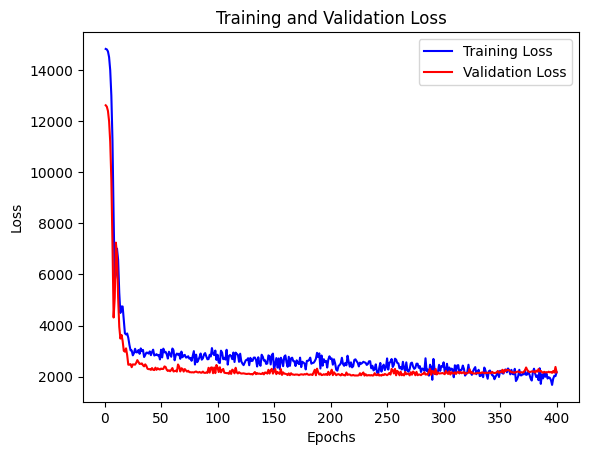

In [ ]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
val_loss = model_history.history['val_loss'][-1]
val_mae = model_history.history['val_mae'][-1]

print('Итоговая ошибка на валидации (Loss):', val_loss)
print('Итоговая средняя абсолютная ошибка на валидации (MAE):', val_mae)

Итоговая ошибка на валидации (Loss): 2170.42724609375
Итоговая средняя абсолютная ошибка на валидации (MAE): 2170.42724609375


## Pipeline Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import set_config

In [ ]:
features_important = ['fuelsystem', 'fueltype', 'doornumber',
       'drivewheel', 'wheelbase', 'curbweight', 'cylindernumber',
       'boreratio',
       'horsepower', 'price']

X = data[features_important].drop('price', axis=1)
y = data[features_important]['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, random_state=42)

In [ ]:
CATEGORICAL = ['fuelsystem']
NUMERICAL = ['fueltype', 'doornumber',
       'drivewheel', 'wheelbase', 'curbweight', 'cylindernumber',
       'boreratio',
       'horsepower']

In [ ]:
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

preprocessors = ColumnTransformer(transformers=[
    ('num', numerical_pipe, NUMERICAL),
    ('cat', categorical_pipe, CATEGORICAL)
])

pipe = Pipeline([
    ('preprocessors', preprocessors),
    ('model', RandomForestRegressor(max_depth=10, n_estimators=300))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['fueltype', 'doornumber',
                                                   'drivewheel', 'wheelbase',
                                                   'curbweight',
                                                   'cylindernumber',
                                                   'boreratio', 'horsepower']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['fuelsystem'])])),
                ('model',
                 RandomForestRegressor(max_depth=10, n_estimators=300))])

In [ ]:
pred_pipe = pipe.predict(X_test)
mae_pipe = mean_absolute_error(y_test, pred_pipe)
print(f'Значение ошибки mae для Pipeline: {mae_pipe}')

Значение ошибки mae для Pipeline: 1951.7793946208112


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
class Imputer(BaseEstimator, TransformerMixin):
    def __init__(self, features, method='constant', value='missing'):
        self.features = features
        self.method = method
        self.value = value

    def fit(self, X, y=None):
        if self.method=='mean':
            self.value = X[self.features].mean()
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed[self.features] = X[self.features].fillna(self.value)
        return X_transformed

class Scaler(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features = features

    def fit(self, X, y=None):
        self.min = X[self.features].min()
        self.range = X[self.features].max()-self.min
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed[self.features] = (X[self.features]-self.min)/self.range
        return X_transformed

class Encoder(BaseEstimator, TransformerMixin):
    def __init__(self, features, drop='first'):
        self.features = features
        self.drop = drop

    def fit(self, X, y=None):
        self.encoder = OneHotEncoder(sparse=False, drop=self.drop)
        self.encoder.fit(X[self.features])
        return self

    def transform(self, X):
        X_transformed = pd.concat([X.drop(columns=self.features).reset_index(drop=True),
                                   pd.DataFrame(self.encoder.transform(X[self.features]),
                                                columns=self.encoder.get_feature_names_out(self.features))],
                                  axis=1)
        return X_transformed

pipe = Pipeline([
    ('num_imputer', Imputer(NUMERICAL, method='mean')),
    ('scaler', Scaler(NUMERICAL)),
    ('cat_imputer', Imputer(CATEGORICAL)),
    ('encoder', Encoder(CATEGORICAL)),
    ('model', RandomForestRegressor())
])

pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('num_imputer',
                 Imputer(features=['fueltype', 'doornumber', 'drivewheel',
                                   'wheelbase', 'curbweight', 'cylindernumber',
                                   'boreratio', 'horsepower'],
                         method='mean',
                         value=fueltype             0.049180
doornumber           3.180328
drivewheel           0.606557
wheelbase           99.726230
curbweight        2667.688525
cylindernumber       4.688525
boreratio            3.335574
horsepower         114.377049
dtype: float64)),
                ('scaler',
                 Scaler(features=['fueltype', 'doornumber', 'drivewheel',
                                  'wheelbase', 'curbweight', 'cylindernumber',
                                  'boreratio', 'horsepower'])),
                ('cat_imputer', Imputer(features=['fuelsystem'])),
                ('encoder', Encoder(features=['fuelsystem'])),
                ('model', RandomForestRegressor())])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

class RandomForestTuner(BaseEstimator, TransformerMixin):
    def __init__(self, param_rf=None, cv=3):
        self.param_rf = param_rf
        self.cv = cv

    def fit(self, X, y=None):
        self.model = RandomForestRegressor()
        self.grid_search = GridSearchCV(self.model, self.param_rf, cv=self.cv)
        self.grid_search.fit(X, y)
        return self

    def transform(self, X):
        # LogisticRegressionTuner не изменяет данные, поэтому просто возвращаем X
        return X

# Определите сетку параметров, которые вы хотите оптимизировать для LogisticRegression
param_rf = {
    'n_estimators': [100, 200, 300, 150],
    'max_depth': [3, 5, 8, 10]
}

# Добавьте LogisticRegressionTuner в ваш конвейер
pipe = Pipeline([
    ('num_imputer', Imputer(NUMERICAL, method='mean')),
    ('scaler', Scaler(NUMERICAL)),
    ('cat_imputer', Imputer(CATEGORICAL)),
    ('encoder', Encoder(CATEGORICAL)),
    ('random_forest_tuner', RandomForestTuner(param_rf=param_rf, cv=5)),
    ('model', RandomForestRegressor())  # Добавьте оптимизированную модель
])

# Запустите конвейер на тренировочных данных
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('num_imputer',
                 Imputer(features=['fueltype', 'doornumber', 'drivewheel',
                                   'wheelbase', 'curbweight', 'cylindernumber',
                                   'boreratio', 'horsepower'],
                         method='mean',
                         value=fueltype             0.049180
doornumber           3.180328
drivewheel           0.606557
wheelbase           99.726230
curbweight        2667.688525
cylindernumber       4.688525
boreratio            3.335574
horsepower         114.377049
dtype: float64)),
                ('scaler',
                 Scaler(features=['fueltype', 'doornumber', 'drivewheel',
                                  'wheelbase', 'curbweight', 'cylindernumber',
                                  'boreratio', 'horsepower'])),
                ('cat_imputer', Imputer(features=['fuelsystem'])),
                ('encoder', Encoder(features=['fuelsystem'])),
                ('logistic_regression_tuner',
                 RandomForestTuner(cv=5,
                                   param_rf={'max_depth': [3, 5, 8, 10],
                                             'n_estimators': [100, 200, 300,
                                                              150]})),
                ('model', RandomForestRegressor())])

## Pipeline

In [159]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
import optuna
import neptune
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from neptune.new.types import File

In [13]:
class ReplaceCategorical(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.replacements = {
            'fueltype': {'gas': 0, 'diesel': 1},
            'drivewheel': {'rwd': 0, 'fwd': 1, '4wd': 2},
            'doornumber': {'two': 2, 'four': 4},
            'cylindernumber': {'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8}
        }

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for column, mapping in self.replacements.items():
            X_transformed[column].replace(mapping, inplace=True)
        return X_transformed

class OneHotEncodeCategorical(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features = features
        self.encoder = OneHotEncoder(sparse_output=False, drop='first')

    def fit(self, X, y=None):
        self.encoder.fit(X[self.features])
        return self

    def transform(self, X):
        X_transformed = X.copy()
        encoded = pd.DataFrame(self.encoder.transform(X[self.features]),
                               columns=self.encoder.get_feature_names_out(self.features),
                               index=X.index)
        X_transformed = pd.concat([X_transformed.drop(columns=self.features), encoded], axis=1)
        return X_transformed

class ComputeFuelEconomy(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['fueleconomy_mean'] = (X_transformed['citympg'] + X_transformed['highwaympg']) / 2
        X_transformed.drop(['citympg', 'highwaympg'], axis=1, inplace=True)
        return X_transformed

class SelectFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features = features

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.features]

In [14]:
CATEGORICAL = ['fuelsystem']
NUMERICAL = ['fueltype', 'doornumber', 'drivewheel', 'wheelbase', 'curbweight', 'cylindernumber',
             'boreratio', 'horsepower', 'fueleconomy_mean']

pipe = Pipeline([
    ('replace_categorical', ReplaceCategorical()),
    ('onehot_encoder', OneHotEncodeCategorical(CATEGORICAL)),
    ('compute_fuel_economy', ComputeFuelEconomy()),
    ('select_features', SelectFeatures(['fueltype', 'doornumber', 'drivewheel', 'wheelbase',
                                        'curbweight', 'cylindernumber', 'boreratio', 'horsepower',
                                        'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
                                        'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
                                        'fuelsystem_spfi', 'fueleconomy_mean'])),
    ('model', RandomForestRegressor())
])

data = pd.read_csv('/content/CarPrice_Assignment.csv')

X = data.drop(columns=['price'])
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('replace_categorical', ReplaceCategorical()),
                ('onehot_encoder',
                 OneHotEncodeCategorical(features=['fuelsystem'])),
                ('compute_fuel_economy', ComputeFuelEconomy()),
                ('select_features',
                 SelectFeatures(features=['fueltype', 'doornumber',
                                          'drivewheel', 'wheelbase',
                                          'curbweight', 'cylindernumber',
                                          'boreratio', 'horsepower',
                                          'fuelsystem_2bbl', 'fuelsystem_4bbl',
                                          'fuelsystem_idi', 'fuelsystem_mfi',
                                          'fuelsystem_mpfi', 'fuelsystem_spdi',
                                          'fuelsystem_spfi',
                                          'fueleconomy_mean'])),
                ('model', RandomForestRegressor())])

In [20]:
pred_pipe = pipe.predict(X_test)
mae_pipe = mean_absolute_error(y_test, pred_pipe)
print(f'Значение ошибки mae для Pipeline: {mae_pipe}')

Значение ошибки mae для Pipeline: 1314.3038170731706


## **Pipeline Network**

In [64]:
class ReplaceCategorical(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.replacements = {
            'fueltype': {'gas': 0, 'diesel': 1},
            'drivewheel': {'rwd': 0, 'fwd': 1, '4wd': 2},
            'doornumber': {'two': 2, 'four': 4},
            'cylindernumber': {'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8}
        }

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for column, mapping in self.replacements.items():
            X_transformed[column].replace(mapping, inplace=True)
        return X_transformed

class OneHotEncodeCategorical(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features = features
        self.encoder = OneHotEncoder(sparse_output=False, drop='first')

    def fit(self, X, y=None):
        self.encoder.fit(X[self.features])
        return self

    def transform(self, X):
        X_transformed = X.copy()
        encoded = pd.DataFrame(self.encoder.transform(X[self.features]),
                               columns=self.encoder.get_feature_names_out(self.features),
                               index=X.index)
        X_transformed = pd.concat([X_transformed.drop(columns=self.features), encoded], axis=1)
        return X_transformed

class ComputeFuelEconomy(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['fueleconomy_mean'] = (X_transformed['citympg'] + X_transformed['highwaympg']) / 2
        X_transformed.drop(['citympg', 'highwaympg'], axis=1, inplace=True)
        return X_transformed

class Scaler(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features = features

    def fit(self, X, y=None):
        self.min = X[self.features].min()
        self.range = X[self.features].max()-self.min
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed[self.features] = (X[self.features]-self.min)/self.range
        return X_transformed

class SelectFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features = features

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.features]

class NeuralNetworkTrainer(BaseEstimator, RegressorMixin):
    def __init__(self, epochs=10, batch_size=32, verbose=1):
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model = None

    def fit(self, X, y=None):
        input_shape = (X.shape[1],)

        model = tf.keras.Sequential([
          tf.keras.layers.Dense(224, activation='relu', input_shape=input_shape),
          tf.keras.layers.Dense(446, activation='relu'),
          tf.keras.layers.Dropout(0.4),
          tf.keras.layers.Dense(312, activation='relu'),
          tf.keras.layers.Dense(1)
              ])

        model.compile(optimizer='adam',
                      loss='mean_absolute_error',
                      metrics=['mae'])

        model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        self.model = model
        return self

    def transform(self, X):
        return X

    def predict(self, X):
        if self.model is None:
            raise ValueError("Модель не обучена")
        y_pred = self.model.predict(X)
        return y_pred.flatten()


In [65]:
CATEGORICAL = ['fuelsystem']
NUMERICAL = ['fueltype', 'doornumber', 'drivewheel', 'wheelbase', 'curbweight', 'cylindernumber',
             'boreratio', 'horsepower', 'fueleconomy_mean']
FOR_SCALER = ['doornumber', 'drivewheel', 'wheelbase', 'curbweight', 'cylindernumber',
             'boreratio', 'horsepower', 'fueleconomy_mean']

pipe = Pipeline([
    ('replace_categorical', ReplaceCategorical()),
    ('onehot_encoder', OneHotEncodeCategorical(CATEGORICAL)),
    ('compute_fuel_economy', ComputeFuelEconomy()),
    ('scaler', Scaler(FOR_SCALER)),
    ('select_features', SelectFeatures(['fueltype', 'doornumber', 'drivewheel', 'wheelbase',
                                        'curbweight', 'cylindernumber', 'boreratio', 'horsepower',
                                        'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
                                        'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
                                        'fuelsystem_spfi', 'fueleconomy_mean'])),
    ('neural_network', NeuralNetworkTrainer(epochs=400, batch_size=32, verbose=1))
])


data = pd.read_csv('/content/CarPrice_Assignment.csv')

X = data.drop(columns=['price'])
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
pipe.fit(X_train, y_train)

Epoch 1/400
6/6 [==============================] - 1s 7ms/step - loss: 13222.5352 - mae: 13222.5352
Epoch 2/400
6/6 [==============================] - 0s 7ms/step - loss: 13218.2588 - mae: 13218.2588
Epoch 3/400
6/6 [==============================] - 0s 6ms/step - loss: 13206.8418 - mae: 13206.8418
Epoch 4/400
6/6 [==============================] - 0s 6ms/step - loss: 13178.9805 - mae: 13178.9805
Epoch 5/400
6/6 [==============================] - 0s 7ms/step - loss: 13119.5566 - mae: 13119.5566
Epoch 6/400
6/6 [==============================] - 0s 7ms/step - loss: 13000.4980 - mae: 13000.4980
Epoch 7/400
6/6 [==============================] - 0s 8ms/step - loss: 12783.2539 - mae: 12783.2539
Epoch 8/400
6/6 [==============================] - 0s 7ms/step - loss: 12405.8389 - mae: 12405.8389
Epoch 9/400
6/6 [==============================] - 0s 8ms/step - loss: 11763.9463 - mae: 11763.9463
Epoch 10/400
6/6 [==============================] - 0s 9ms/step - loss: 10768.1025 - mae: 10768.1025

Pipeline(steps=[('replace_categorical', ReplaceCategorical()),
                ('onehot_encoder',
                 OneHotEncodeCategorical(features=['fuelsystem'])),
                ('compute_fuel_economy', ComputeFuelEconomy()),
                ('scaler',
                 Scaler(features=['doornumber', 'drivewheel', 'wheelbase',
                                  'curbweight', 'cylindernumber', 'boreratio',
                                  'horsepower', 'fueleconomy_mean'])),
                ('select_features',
                 SelectFeatures(features=['fueltype', 'doornumber',
                                          'drivewheel', 'wheelbase',
                                          'curbweight', 'cylindernumber',
                                          'boreratio', 'horsepower',
                                          'fuelsystem_2bbl', 'fuelsystem_4bbl',
                                          'fuelsystem_idi', 'fuelsystem_mfi',
                                          'fuelsystem_mpfi', 'fuelsystem_spdi',
                                          'fuelsystem_spfi',
                                          'fueleconomy_mean'])),
                ('neural_network', NeuralNetworkTrainer(epochs=400))])

In [67]:
pred_pipe = pipe.predict(X_test)
mae_pipe = mean_absolute_error(y_test, pred_pipe)
print(f'Значение ошибки mae для Pipeline Network: {mae_pipe}')

2/2 [==============================] - 0s 7ms/step
Значение ошибки mae для Pipeline Network: 2255.3678661394815


## **Pipeline Netwwork With Nepruna-Optuna**

In [163]:
class ReplaceCategorical(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.replacements = {
            'fueltype': {'gas': 0, 'diesel': 1},
            'drivewheel': {'rwd': 0, 'fwd': 1, '4wd': 2},
            'doornumber': {'two': 2, 'four': 4},
            'cylindernumber': {'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8}
        }

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for column, mapping in self.replacements.items():
            X_transformed[column].replace(mapping, inplace=True)
        return X_transformed

class OneHotEncodeCategorical(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features = features
        self.encoder = OneHotEncoder(sparse_output=False, drop='first')

    def fit(self, X, y=None):
        self.encoder.fit(X[self.features])
        return self

    def transform(self, X):
        X_transformed = X.copy()
        encoded = pd.DataFrame(self.encoder.transform(X[self.features]),
                               columns=self.encoder.get_feature_names_out(self.features),
                               index=X.index)
        X_transformed = pd.concat([X_transformed.drop(columns=self.features), encoded], axis=1)
        return X_transformed

class ComputeFuelEconomy(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['fueleconomy_mean'] = (X_transformed['citympg'] + X_transformed['highwaympg']) / 2
        X_transformed.drop(['citympg', 'highwaympg'], axis=1, inplace=True)
        return X_transformed

class Scaler(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features = features

    def fit(self, X, y=None):
        self.min = X[self.features].min()
        self.range = X[self.features].max()-self.min
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed[self.features] = (X[self.features]-self.min)/self.range
        return X_transformed

class SelectFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, features):
        self.features = features

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.features]

class NeuralNetworkTrainer(BaseEstimator, RegressorMixin):
    def __init__(self, epochs=10, batch_size=32, verbose=1):
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model = None

    def fit(self, X, y=None):
        input_shape = (X.shape[1],)

        # Define the objective function for Optuna optimization
        def objective(trial):
            print("Starting a new trial")
            try:
                # Split the data into training and validation sets
                X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

                # Define hyperparameters to optimize
                dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)
                units_layer1 = trial.suggest_int('units_layer1', 32, 512)
                units_layer2 = trial.suggest_int('units_layer2', 32, 512)
                units_layer3 = trial.suggest_int('units_layer3', 32, 512)

                # Create a model with the suggested hyperparameters
                model = tf.keras.models.Sequential([
                    tf.keras.layers.Dense(units_layer1, activation='relu', input_shape=input_shape),
                    tf.keras.layers.Dense(units_layer2, activation='relu'),
                    tf.keras.layers.Dropout(dropout_rate),
                    tf.keras.layers.Dense(units_layer3, activation='relu'),
                    tf.keras.layers.Dense(1)
                ])

                # Compile the model
                model.compile(optimizer='adam', loss='mae', metrics=['mae'])

                # Train the model
                model.fit(X_train, y_train, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)

                # Evaluate the model on the validation set
                y_pred = model.predict(X_val)
                mae = mean_absolute_error(y_val, y_pred)
                print(f"Trial completed with MAE: {mae}")
                return mae
            except Exception as e:
                print(f"An error occurred during the trial: {e}")
                raise

        # Create and run the Optuna optimization study
        study = optuna.create_study(direction='minimize')
        study.optimize(objective, n_trials=5)

        # Get the best parameters and initialize the model with them
        best_params = study.best_params
        self.model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(best_params['units_layer1'], activation='relu', input_shape=input_shape),
            tf.keras.layers.Dense(best_params['units_layer2'], activation='relu'),
            tf.keras.layers.Dropout(best_params['dropout_rate']),
            tf.keras.layers.Dense(best_params['units_layer3'], activation='relu'),
            tf.keras.layers.Dense(1)
        ])
        self.model.compile(optimizer='adam', loss='mae', metrics=['mae'])
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)

        return self

    def transform(self, X):
        return X

    def predict(self, X):
        if self.model is None:
            raise ValueError("Model is not trained")
        return self.model.predict(X)

    def score(self, X, y=None):
        y_pred = self.predict(X)
        mae = mean_absolute_error(y, y_pred)
        return mae


In [164]:
run = neptune.init_project(project="delakoka/HW27", api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIyMDNhNjVjYi1jZjU1LTQ5MjItODM0Zi03ZDQyNzhhZGQ2ODYifQ==")


CATEGORICAL = ['fuelsystem']
NUMERICAL = ['fueltype', 'doornumber', 'drivewheel', 'wheelbase', 'curbweight', 'cylindernumber',
             'boreratio', 'horsepower', 'fueleconomy_mean']
FOR_SCALER = ['fueltype', 'doornumber', 'drivewheel', 'wheelbase',
                                        'curbweight', 'cylindernumber', 'boreratio', 'horsepower',
                                        'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
                                        'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
                                        'fuelsystem_spfi', 'fueleconomy_mean']


pipe = Pipeline([
    ('replace_categorical', ReplaceCategorical()),
    ('onehot_encoder', OneHotEncodeCategorical(CATEGORICAL)),
    ('compute_fuel_economy', ComputeFuelEconomy()),
    ('scaler', Scaler(FOR_SCALER)),
    ('select_features', SelectFeatures(['fueltype', 'doornumber', 'drivewheel', 'wheelbase',
                                        'curbweight', 'cylindernumber', 'boreratio', 'horsepower',
                                        'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
                                        'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
                                        'fuelsystem_spfi', 'fueleconomy_mean'])),
    ('neural_network_trainer', NeuralNetworkTrainer(epochs=400, batch_size=32, verbose=1))
])

data = pd.read_csv('/content/CarPrice_Assignment.csv')

X = data.drop(columns=['price'])
y = data['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype(np.float64)
y_test = y_test.astype(np.float64)

[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/delakoka/HW27/


In [165]:
pipe.fit(X_train, y_train)

[I 2024-07-05 20:25:41,685] A new study created in memory with name: no-name-37894d4a-210f-465a-8584-215b7ce23e3b


Starting a new trial
Epoch 1/400


<ipython-input-163-61f0b1ec5baf>:88: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)


5/5 [==============================] - 1s 4ms/step - loss: 13648.7754 - mae: 13648.7754
Epoch 2/400
5/5 [==============================] - 0s 4ms/step - loss: 13648.1807 - mae: 13648.1807
Epoch 3/400
5/5 [==============================] - 0s 4ms/step - loss: 13647.3262 - mae: 13647.3262
Epoch 4/400
5/5 [==============================] - 0s 4ms/step - loss: 13646.0645 - mae: 13646.0645
Epoch 5/400
5/5 [==============================] - 0s 4ms/step - loss: 13643.9375 - mae: 13643.9375
Epoch 6/400
5/5 [==============================] - 0s 4ms/step - loss: 13640.7139 - mae: 13640.7139
Epoch 7/400
5/5 [==============================] - 0s 4ms/step - loss: 13635.8682 - mae: 13635.8682
Epoch 8/400
5/5 [==============================] - 0s 4ms/step - loss: 13628.0684 - mae: 13628.0684
Epoch 9/400
5/5 [==============================] - 0s 4ms/step - loss: 13616.9629 - mae: 13616.9629
Epoch 10/400
5/5 [==============================] - 0s 4ms/step - loss: 13601.1621 - mae: 13601.1621
Epoch 11/40

[I 2024-07-05 20:26:03,586] Trial 0 finished with value: 1982.408114346591 and parameters: {'dropout_rate': 0.30673148600204425, 'units_layer1': 148, 'units_layer2': 115, 'units_layer3': 67}. Best is trial 0 with value: 1982.408114346591.


Trial completed with MAE: 1982.408114346591
Starting a new trial
Epoch 1/400


<ipython-input-163-61f0b1ec5baf>:88: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)


5/5 [==============================] - 1s 10ms/step - loss: 13648.5977 - mae: 13648.5977
Epoch 2/400
5/5 [==============================] - 0s 10ms/step - loss: 13647.0869 - mae: 13647.0869
Epoch 3/400
5/5 [==============================] - 0s 10ms/step - loss: 13644.4863 - mae: 13644.4863
Epoch 4/400
5/5 [==============================] - 0s 12ms/step - loss: 13639.7500 - mae: 13639.7500
Epoch 5/400
5/5 [==============================] - 0s 11ms/step - loss: 13631.5801 - mae: 13631.5801
Epoch 6/400
5/5 [==============================] - 0s 10ms/step - loss: 13618.0049 - mae: 13618.0049
Epoch 7/400
5/5 [==============================] - 0s 9ms/step - loss: 13596.1973 - mae: 13596.1973
Epoch 8/400
5/5 [==============================] - 0s 9ms/step - loss: 13562.8076 - mae: 13562.8076
Epoch 9/400
5/5 [==============================] - 0s 10ms/step - loss: 13513.1650 - mae: 13513.1650
Epoch 10/400
5/5 [==============================] - 0s 10ms/step - loss: 13439.1650 - mae: 13439.1650
Epo

[I 2024-07-05 20:26:46,371] Trial 1 finished with value: 1861.778231534091 and parameters: {'dropout_rate': 0.27476669860883907, 'units_layer1': 43, 'units_layer2': 511, 'units_layer3': 207}. Best is trial 1 with value: 1861.778231534091.


Trial completed with MAE: 1861.778231534091
Starting a new trial


<ipython-input-163-61f0b1ec5baf>:88: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)


Epoch 1/400
5/5 [==============================] - 2s 9ms/step - loss: 13648.7246 - mae: 13648.7246
Epoch 2/400
5/5 [==============================] - 0s 8ms/step - loss: 13646.7021 - mae: 13646.7021
Epoch 3/400
5/5 [==============================] - 0s 8ms/step - loss: 13641.6143 - mae: 13641.6143
Epoch 4/400
5/5 [==============================] - 0s 7ms/step - loss: 13629.5859 - mae: 13629.5859
Epoch 5/400
5/5 [==============================] - 0s 8ms/step - loss: 13604.2139 - mae: 13604.2139
Epoch 6/400
5/5 [==============================] - 0s 9ms/step - loss: 13555.5713 - mae: 13555.5713
Epoch 7/400
5/5 [==============================] - 0s 8ms/step - loss: 13467.3662 - mae: 13467.3662
Epoch 8/400
5/5 [==============================] - 0s 9ms/step - loss: 13316.4229 - mae: 13316.4229
Epoch 9/400
5/5 [==============================] - 0s 8ms/step - loss: 13070.0771 - mae: 13070.0771
Epoch 10/400
5/5 [==============================] - 0s 8ms/step - loss: 12673.6191 - mae: 12673.6191

2/2 [==============================] - 0s 14ms/step


[I 2024-07-05 20:27:13,347] Trial 2 finished with value: 1792.6258729876895 and parameters: {'dropout_rate': 0.38041792162722743, 'units_layer1': 252, 'units_layer2': 377, 'units_layer3': 417}. Best is trial 2 with value: 1792.6258729876895.
<ipython-input-163-61f0b1ec5baf>:88: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)


Trial completed with MAE: 1792.6258729876895
Starting a new trial
Epoch 1/400
5/5 [==============================] - 1s 11ms/step - loss: 13648.5850 - mae: 13648.5850
Epoch 2/400
5/5 [==============================] - 0s 11ms/step - loss: 13646.3857 - mae: 13646.3857
Epoch 3/400
5/5 [==============================] - 0s 12ms/step - loss: 13641.2705 - mae: 13641.2705
Epoch 4/400
5/5 [==============================] - 0s 10ms/step - loss: 13630.0732 - mae: 13630.0732
Epoch 5/400
5/5 [==============================] - 0s 11ms/step - loss: 13608.0410 - mae: 13608.0410
Epoch 6/400
5/5 [==============================] - 0s 12ms/step - loss: 13566.6738 - mae: 13566.6738
Epoch 7/400
5/5 [==============================] - 0s 11ms/step - loss: 13493.4463 - mae: 13493.4463
Epoch 8/400
5/5 [==============================] - 0s 10ms/step - loss: 13367.6709 - mae: 13367.6709
Epoch 9/400
5/5 [==============================] - 0s 11ms/step - loss: 13167.0293 - mae: 13167.0293
Epoch 10/400
5/5 [=======

2/2 [==============================] - 0s 8ms/step


[I 2024-07-05 20:27:55,974] Trial 3 finished with value: 1768.1193773674242 and parameters: {'dropout_rate': 0.11186661660116402, 'units_layer1': 226, 'units_layer2': 261, 'units_layer3': 440}. Best is trial 3 with value: 1768.1193773674242.
<ipython-input-163-61f0b1ec5baf>:88: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout_rate', 0.1, 0.5)


Trial completed with MAE: 1768.1193773674242
Starting a new trial
Epoch 1/400
5/5 [==============================] - 1s 15ms/step - loss: 13648.7539 - mae: 13648.7539
Epoch 2/400
5/5 [==============================] - 0s 13ms/step - loss: 13647.3213 - mae: 13647.3213
Epoch 3/400
5/5 [==============================] - 0s 14ms/step - loss: 13643.9678 - mae: 13643.9678
Epoch 4/400
5/5 [==============================] - 0s 16ms/step - loss: 13636.1514 - mae: 13636.1514
Epoch 5/400
5/5 [==============================] - 0s 11ms/step - loss: 13621.0049 - mae: 13621.0049
Epoch 6/400
5/5 [==============================] - 0s 15ms/step - loss: 13591.6309 - mae: 13591.6309
Epoch 7/400
5/5 [==============================] - 0s 13ms/step - loss: 13539.5713 - mae: 13539.5713
Epoch 8/400
5/5 [==============================] - 0s 11ms/step - loss: 13452.2031 - mae: 13452.2031
Epoch 9/400
5/5 [==============================] - 0s 10ms/step - loss: 13303.2324 - mae: 13303.2324
Epoch 10/400
5/5 [=======

[I 2024-07-05 20:28:22,882] Trial 4 finished with value: 1759.7013938210227 and parameters: {'dropout_rate': 0.38229559219893383, 'units_layer1': 224, 'units_layer2': 356, 'units_layer3': 301}. Best is trial 4 with value: 1759.7013938210227.


Epoch 1/400
6/6 [==============================] - 1s 8ms/step - loss: 13222.8477 - mae: 13222.8477
Epoch 2/400
6/6 [==============================] - 0s 7ms/step - loss: 13220.2041 - mae: 13220.2041
Epoch 3/400
6/6 [==============================] - 0s 8ms/step - loss: 13213.1709 - mae: 13213.1709
Epoch 4/400
6/6 [==============================] - 0s 8ms/step - loss: 13195.5029 - mae: 13195.5029
Epoch 5/400
6/6 [==============================] - 0s 8ms/step - loss: 13159.0166 - mae: 13159.0166
Epoch 6/400
6/6 [==============================] - 0s 8ms/step - loss: 13084.8281 - mae: 13084.8281
Epoch 7/400
6/6 [==============================] - 0s 7ms/step - loss: 12947.4180 - mae: 12947.4180
Epoch 8/400
6/6 [==============================] - 0s 12ms/step - loss: 12695.7021 - mae: 12695.7021
Epoch 9/400
6/6 [==============================] - 0s 9ms/step - loss: 12278.1924 - mae: 12278.1924
Epoch 10/400
6/6 [==============================] - 0s 10ms/step - loss: 11619.2363 - mae: 11619.23

Pipeline(steps=[('replace_categorical', ReplaceCategorical()),
                ('onehot_encoder',
                 OneHotEncodeCategorical(features=['fuelsystem'])),
                ('compute_fuel_economy', ComputeFuelEconomy()),
                ('scaler',
                 Scaler(features=['fueltype', 'doornumber', 'drivewheel',
                                  'wheelbase', 'curbweight', 'cylindernumber',
                                  'boreratio', 'horsepower', 'fuelsystem_2bbl',
                                  'fuelsystem_4bbl', 'fuelsys...
                ('select_features',
                 SelectFeatures(features=['fueltype', 'doornumber',
                                          'drivewheel', 'wheelbase',
                                          'curbweight', 'cylindernumber',
                                          'boreratio', 'horsepower',
                                          'fuelsystem_2bbl', 'fuelsystem_4bbl',
                                          'fuelsystem_idi', 'fuelsystem_mfi',
                                          'fuelsystem_mpfi', 'fuelsystem_spdi',
                                          'fuelsystem_spfi',
                                          'fueleconomy_mean'])),
                ('neural_network_trainer', NeuralNetworkTrainer(epochs=400))])

In [166]:
pred_pipe = pipe.predict(X_test)
mae_pipe = mean_absolute_error(y_test, pred_pipe)
print(f'Значение ошибки mae для Pipeline Network Optuna: {mae_pipe}')

2/2 [==============================] - 0s 10ms/step
Значение ошибки mae для Pipeline Network Optuna: 2205.9785749809453
